# Travel Tide User Segmentation and Analysis, Executive Summary

### Introduction

Our travel company 'Travel Tide' has initiated a project to develop loyalty perks for our clients. We created different perks and assigned these perks to user groups that are likely to love it. The primary analysis revolves around segmenting users based on different criteria such as demographics, travel preferences, and booking behaviors.<br>

The segmentation should grab customers attention and maximize the likelihood they will sign up for the rewards program. <br>
This report summarizes the findings from our data analysis.

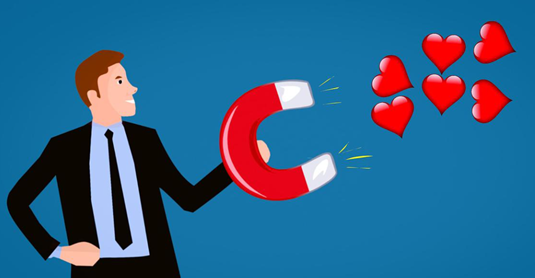

### Methodology

Before we created a segmentation for the app user, we needed to filter for active users:<br>

*   We only include sessions after '2023-01-04'
*   Also we only include users that have 8 or more sessions after this date mentioned above
<br><br>


We have four tables we worked with:

*   **users**: User demographic information
*   **sessions**: Information about individual browsing sessions
*   **flights**: Information about purchased flights
*   **hotels**: Information about purchased hotel stays
<br><br>

After filtering we  generated a session based table, which we then aggregated and grouped by users to created a user based table.<br>
For assigning users to a perk we choosed a scoring system that uses combined metrics and their weightings to generate a number between 0 and 1 for each perk for every user.<br> The 'Overall Discount' benefit includes all users who are not assigned to other perks, mostly users that did not book a trip with our app till now.

### Key Findings

Our analysis has found valuable insights to create a foundation of a "Travel Tide" rewards program. <br>
We used 6 different perks for rewarding all the active users we have in our database.

*   Overall Discount
*   Free Hotel Night
*   Free checked Bag
*   Hotel Discounts
*   Flight Discounts
*   Safety

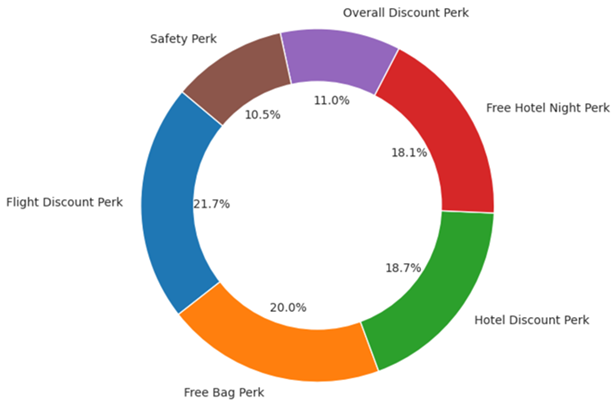

Safety Perk, *Golden Geese*:

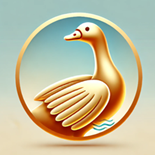

This is the smallest group and this is intended. Their name *Golden Geese* represents their behavior in spending the most money from our active users.<br>
This perk ensures that TravelTide will book alternative arrangements (hotel or flight) if a booked trip faces issues like cancellations. This perk is aimed at users with substantial spending, and there is a **possibility of charging for this service.**<br>
The focus for this group is the high overall spending, including specific metrics like average spending on flights and hotels.<br><br>
The following chart shows the distribution of the weights of the individual metrics:

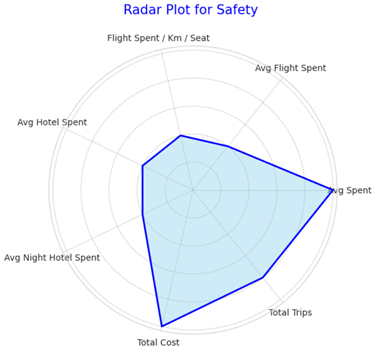



---



Flight Discount, *Flying Seagulls*

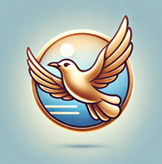

This group, the *Flying Seagulls*, got their name because a seagull is looking out for a tasty fish sandwich in your hand to take it off you, and that's like a good discount before booking.<br><br>
Therefore we suggest that this perk will give out a **15% discount** for booking a flight. (1% higher than the average flight discounts we offered)<br><br>
The focus for this group is a higher rate or equal number of flights to hotels booked and we include the users sessions behaviour in form of session length and number of clicks. Furthermore the average discounts the user used for their booked trips will be also be weighted.<br><br>
The following chart shows the distribution of the weights of the individual metrics:

In [19]:
user_base_table['avg_flight_discount_amount'].mean().round(2)

NameError: name 'user_base_table' is not defined

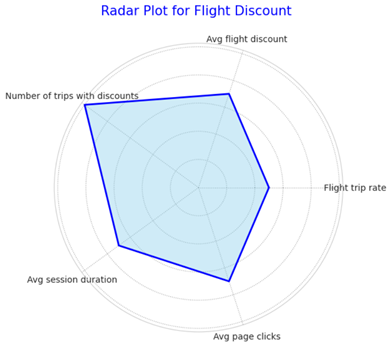



---



Hotel Discount, *Hermit Crabs*

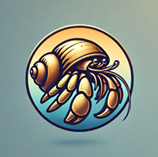

This group, the *Hermit Crabs*, got their name because a hermit crab will look out for a nice cozy shell to sleep in, thats like looking out for a good discount for a hotel booking.<br><br>
Therefore we suggest that this perk will give out a **12% discount** for booking a hotel. (1% higher than the average hotel discounts we offered)<br><br>
The focus for this group is a higher rate or equal number of hotels to flights booked and we include the users sessions behaviour in form of session length and number of clicks. Furthermore the average discounts the user used for their booked trips will be also be weighted.

In [ ]:
user_base_table['avg_hotel_discount_amount'].mean().round(2)

The following chart shows the distribution of the weights of the individual metrics:

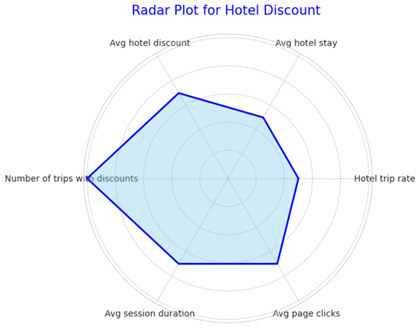



---



Free Bag, *Working Bees*

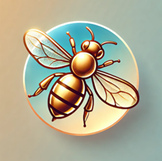

This group, the *Working Bees* got their name, because a bee is always flying with some extra weight they transport, like our users that have checked a bag for a flight.<br><br>
Therefore we suggest that this perk will let the user check in **one bag for free**<br><br>
The focus for this group is a regular flight use with an average of 1 or more bags per flight.<br><br>
The following chart shows the distribution of the weights of the individual metrics:

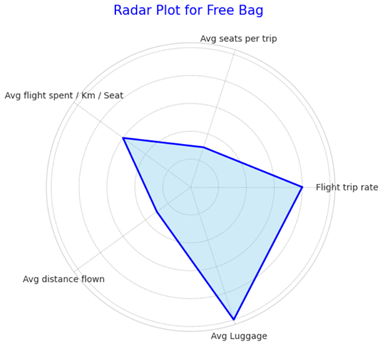



---



Free Hotel Night, *Sleeping Squirrels*

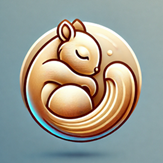

This group, the *Sleeping Squirrels* got their name, because squirrels have different places where they sleep, it is like someone who sleeps in different hotels.<br><br>
Therefore we suggest that this perk will let the user have **one free hotel night**.<br><br>
The emphasis is on the fact that hotel bookings are worth at least as much or more than flight bookings. In addition, the length of time and average spend on a hotel play a role in gaining this advantage. This group is also the second hotel-loving group, but *sleeping squirrel* users are not primarily looking for discounts.<br><br>
The following chart shows the distribution of the weights of the individual metrics:

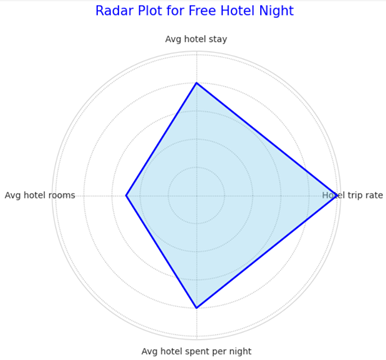



---



Overall Discount, *Unsure Cats*

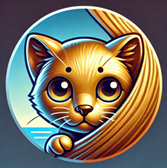

This group, the *Unsure Cats* are called like this, because like shy cats, these users needs to get a treat before they book a trip.<br><br>
Most users in the second smallest group have not booked a trip at all. So there's not much more user behavior that we can use to give them a perk that they would like. The only thing we know is that these users are active and have had more or equal to 8 sessions.<br><br>
Therefore we would suggest that this group will get a bigger **overall discount of 25-35%**.

### Recommendations

This analysis is a first approach, on a limited data foundation, to get a reward programm started. Therefore we had no evidence or data on the perks itself and we needed to come up with perks from scratch. Thats why it needs to be tested or validated in the future.<br><br>
One test we would suggest is **A/B testing**, because we can track key performance indicators (KPIs) to check which group performs better. This removes the guesswork and allows for data-driven decision-making. Also A/B testing allows us to test the waters on a smaller scale. This approach minimizes potential risks or downsides of a poorly designed segmentation strategy, helping avoid unintended negative consequences.<br><br>
Furthermore we can develop a multi-level rewards program that offers different levels for each perk. Our scoring system will be useful to implement this in the future because a user could have scores for more than one perk.<br><br>
Another recommendation is to try to get more younger users to use our app. The birthyear 2006 has a big trend in using our app and the numbers of users from this year is bigger in comparison of other users from our app. We could create specific perks for them, or make an abo-model, so that these young people will built up a habit in using our app. This could be a great opportunity for our growth rate.



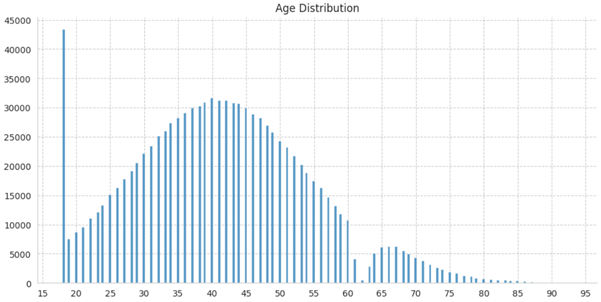

# Explorational Analysis

In [67]:
import pandas as pd
import sqlalchemy as sa
from sqlalchemy import create_engine, text
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches

In [68]:
import os
from dotenv import load_dotenv

load_dotenv('url_traveltide.env')  # This loads the environment variables from the .env file
DB_URL = os.getenv('DATABASE_URL')

engine = sa.create_engine(DB_URL)
connection = engine.connect().execution_options(isolation_level="AUTOCOMMIT")

Before we start to create our filtered session based dataframe we will explore the whole given dataset a bit.<br>
We will use SQL queries to create plot DataFrames, so that it will not be necessary to load the hole dataset into a DataFrame. This will use way less RAM and running the code is much faster.<br><br>
First have a look at the database schema:

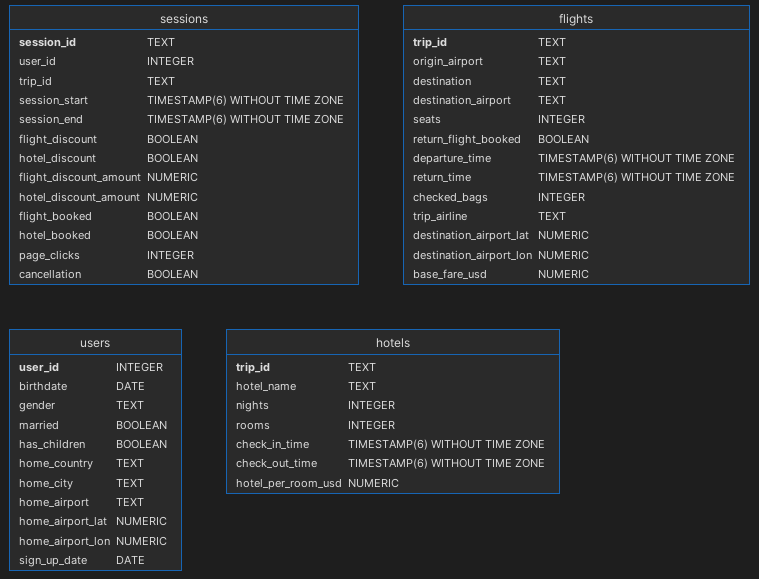

As we can see at this schema, this provided database has no meta data for foreign keys, connections between each table.
(This schema is created with DB Visualizer v.24.2.1)<br><br>


Thus we need to check if every connection between our tables is working as intended or not. To check this real quick we can write two little queries which will check out if there are values from our keys that shouldnt be there. (I.e. two different user_id in a single row after joining)

**Starting with checking user_id:**

In [73]:
query = """

SELECT user_id
FROM users

EXCEPT

SELECT user_id
FROM sessions

"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


Empty DataFrame
Columns: [user_id]
Index: []

**Now lets look for trip_id**

In [75]:
query = """

SELECT trip_id
FROM sessions

EXCEPT

SELECT trip_id
FROM hotels
FULL JOIN flights
USING(trip_id)

"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


trip_id
0    None

It looks like that in this database the given keys will work out, else we would have seen some IDs on our outputs. Thus we can have a look at a schema with connected tables:

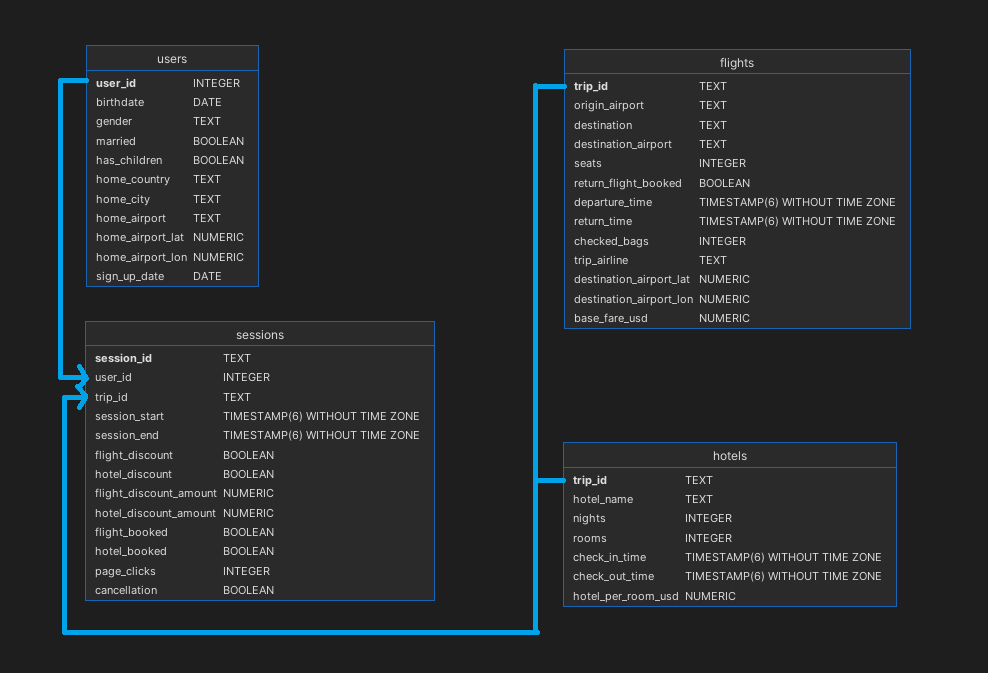

**Checking numeric data in our tables:**

In [79]:
query = """

SELECT
       birthdate,
       sign_up_date

FROM users

"""
print('-----------------------------------------------------------------')
print('Users table:')
display(pd.read_sql(text(query),connection).describe().T)

query = """

SELECT
        session_start,
        session_end,
        flight_discount_amount,
        hotel_discount_amount,
        page_clicks

FROM sessions

"""
print('-----------------------------------------------------------------')
print('Sessions table:')
display(pd.read_sql(text(query),connection).describe().T)

query = """

SELECT
        seats,
        departure_time,
        return_time,
        checked_bags,
        base_fare_usd

FROM flights

"""
print('-----------------------------------------------------------------')
print('Flights table:')
display(pd.read_sql(text(query),connection).describe().T)

query = """

SELECT
        nights,
        rooms,
        check_in_time,
        check_out_time,
        hotel_per_room_usd

FROM hotels

"""
print('-----------------------------------------------------------------')
print('Hotels table:')
display(pd.read_sql(text(query),connection).describe().T)

-----------------------------------------------------------------
Users table:


count unique         top  freq
birthdate     1020926  22581  2006-09-03   169
sign_up_date  1020926    831  2023-05-15  3326

-----------------------------------------------------------------
Sessions table:


count                           mean  \
session_start             5408063  2022-12-12 02:37:01.270523392   
session_end               5408063  2022-12-12 02:40:35.487092480   
flight_discount_amount   885796.0                       0.139765   
hotel_discount_amount    691380.0                        0.11095   
page_clicks             5408063.0                      18.766031   

                                        min                         25%  \
session_start           2021-04-01 00:42:00         2022-08-30 12:52:00   
session_end             2021-04-01 00:43:40  2022-08-30 12:57:44.500000   
flight_discount_amount                 0.05                         0.1   
hotel_discount_amount                  0.05                        0.05   
page_clicks                             0.0                         7.0   

                                        50%                  75%  \
session_start           2023-01-28 09:13:00  2023-04-22 20:33:00   
session_end             2023-01-28 09:16:45  2023-04-22 20:37:01   
flight_discount_amount                  0.1                  0.2   
hotel_discount_amount                   0.1                 0.15   
page_clicks                            15.0                 23.0   

                                        max        std  
session_start           2023-07-28 23:57:55        NaN  
session_end             2023-07-29 01:57:55        NaN  
flight_discount_amount                 0.85   0.085191  
hotel_discount_amount                  0.65   0.062021  
page_clicks                          2421.0  22.180703

-----------------------------------------------------------------
Flights table:


count                           mean                  min  \
seats           1901038.0                       1.250864                  0.0   
departure_time    1901038  2023-01-08 23:52:40.265286400  2021-04-06 07:00:00   
return_time       1812304  2023-01-14 08:25:00.002650368  2021-04-09 07:00:00   
checked_bags    1901038.0                       0.608209                  0.0   
base_fare_usd   1901038.0                     644.378692                  0.0   

                                25%                  50%                  75%  \
seats                           1.0                  1.0                  1.0   
departure_time  2022-09-29 07:00:00  2023-02-15 08:00:00  2023-05-18 07:00:00   
return_time     2022-10-04 07:00:00  2023-02-20 07:00:00  2023-05-23 07:00:00   
checked_bags                    0.0                  1.0                  1.0   
base_fare_usd                202.66               396.05               637.53   

                                max          std  
seats                          12.0     0.640477  
departure_time  2024-07-19 22:00:00          NaN  
return_time     2024-08-19 18:00:00          NaN  
checked_bags                   13.0     0.717282  
base_fare_usd              29987.92  1097.362802

-----------------------------------------------------------------
Hotels table:


count                           mean  \
nights              1918617.0                       4.271452   
rooms               1918617.0                       1.189341   
check_in_time         1918617  2022-12-28 01:29:14.870725376   
check_out_time        1918617  2023-01-01 19:18:30.184679936   
hotel_per_room_usd  1918617.0                     177.305372   

                                           min                            25%  \
nights                                    -2.0                            1.0   
rooms                                      0.0                            1.0   
check_in_time       2021-04-06 10:40:44.175000  2022-09-15 19:40:52.004999936   
check_out_time             2021-04-08 11:00:00            2022-09-20 11:00:00   
hotel_per_room_usd                         8.0                           99.0   

                                              50%  \
nights                                        3.0   
rooms                                         1.0   
check_in_time       2023-02-09 10:56:12.884999936   
check_out_time                2023-02-13 11:00:00   
hotel_per_room_usd                          148.0   

                                              75%                         max  \
nights                                        6.0                       107.0   
rooms                                         1.0                         6.0   
check_in_time       2023-05-07 13:23:32.055000064  2024-07-20 17:08:06.585000   
check_out_time                2023-05-12 11:00:00         2024-08-13 11:00:00   
hotel_per_room_usd                          222.0                      2377.0   

                           std  
nights                4.488629  
rooms                 0.487965  
check_in_time              NaN  
check_out_time             NaN  
hotel_per_room_usd  117.183371

What can we see in this overview of numeric data?

* First we can see that in our flights and hotels table are datetime values from 2024 but our session datetime value for sign up dates endet 2023-07, that is because we only get session data till that time date.<br>
* Furthermore we can see that our nights column in hotels has some negative numbers. These figures should be set to 1, as can be seen from a response to this topic from “Travel Tide”.<br>
* Another number that should be considered is the 0 in rooms. This should not be possible, because the user have to rent 1 room when staying at a hotel.

**Outliers to consider:**

Session table:


*   page_clicks has a big max outlier with 2421 clicks in one session where the mean is only 18.77 clicks.<br>

Hotels table:

* nights has a big max outlier with 107 nights where the mean is only 4.27
<br>

Flights table:

* base_fare_usd has a big max outlier with 29987.92 where the mean is only 644.39
* checked_bags has a max outlier with 13 where the mean is only 0.61
* seats has a max outlier with 12 where the mean is only 1.25
<br>

*For the base_fare_usd outlier we can consider it is because of the number of seats that were booked for this flight by the user. So it would be better to get the price per seat to look for outliers.*

**Now we will get some answers out of our data, to get a better inside:**

How many trips per year Travel Tide has?

In [83]:
query = """

SELECT
        EXTRACT(YEAR FROM session_start) AS trip_year,
        EXTRACT(MONTH FROM session_start) AS trip_month,
        COUNT(trip_id)
FROM sessions
GROUP BY trip_year, trip_month

"""

# saving our query into a new df

plot_df = pd.DataFrame()
plot_df = pd.read_sql(text(query),connection)

# renaming columns to year and month for creating a datetime column of them

plot_df = plot_df.rename(columns={'trip_year': 'year', 'trip_month': 'month'})
plot_df['year_month'] = pd.to_datetime(plot_df.assign(day=1)[['year', 'month', 'day']])

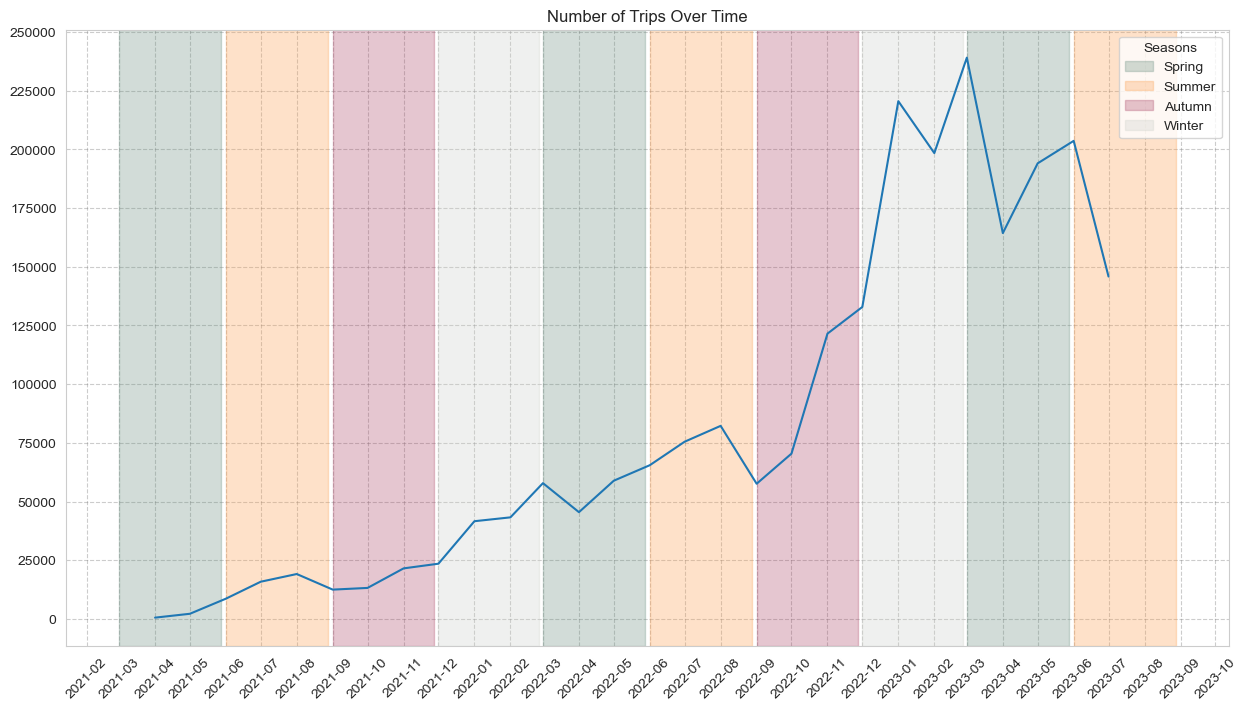

In [84]:
# ploting out the number of trips over time

plt.figure(figsize=(15,8))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.lineplot(data=plot_df, x='year_month', y='count')

# Highlight specific months (August and September 2021 and 2022)

#HIGHLIGHT SEASONS!!!!!!!!!!
highlight_areas = [('2021-03-01', '2021-05-28'),         # Spring
                   ('2021-06-01', '2021-08-28'),         # Summer
                   ('2021-09-01', '2021-11-27'),         # Autumn
                   ('2021-12-01', '2022-02-26'),         # Winter
                   ('2022-03-01', '2022-05-28'),         # Spring
                   ('2022-06-01', '2022-08-28'),         # Summer
                   ('2022-09-01', '2022-11-27'),         # Autumn
                   ('2022-12-01', '2023-02-26'),         # Winter
                   ('2023-03-01', '2023-05-28'),         # Spring
                   ('2023-06-01', '2023-08-28')]         # Summer


highlight_areas_2023 = ('2023-04-01', '2023-08-01')

# Convert date strings to datetime objects and use `axvspan` to shade

i = 0

for start_date, end_date in highlight_areas:

    if i == 0:
        color_h = '#6A8E7F'          # spring color
        i += 1
    elif i == 1:
        color_h = '#FC9E4F'          # summer color
        i += 1
    elif i == 2:
        color_h = '#AA4465'          # autumn color
        i += 1
    elif i == 3:
        color_h = '#CCD0CA'          # winter color
        i = 0

    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color=color_h, alpha=0.3)

# Create legend patches for the seasons

legend_patches = [mpatches.Patch(color='#6A8E7F', label='Spring', alpha=0.3),
                  mpatches.Patch(color='#FC9E4F', label='Summer', alpha=0.3),
                  mpatches.Patch(color='#AA4465', label='Autumn', alpha=0.3),
                  mpatches.Patch(color='#CCD0CA', label='Winter', alpha=0.3)]

# Add legend to the plot

plt.legend(handles=legend_patches, title="Seasons", loc="upper right")

# Set the x-axis ticks to show every month

plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set tick frequency to monthly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format tick labels as "YYYY-MM"

plt.xlabel('')
plt.ylabel('')
plt.title('Number of Trips Over Time')
plt.xticks(rotation=45)
plt.yticks(np.arange(0, 250001, 25000))
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.4)
plt.show()
plt.close()

This chart shows us the number of trips over time with a color indicator for each season.
<br><br>
**2021**<br><br>

*Spring*:<br>
We can see that the number of trips are rising in this season. Numbers ended *higher* than started.<br><br>
*Summer*:<br>
For this season the number of trips are rising at the beginning and at end of summer they decline. Numbers ended *higher* than started.<br><br>
*Autumn*:<br>
Starting into autumn our trip numbers stay nearly the same but mid to end of this season they are rising again. Numbers ended *higher* than started.<br><br>
*Winter*:<br>
For the whole winter season our trip numbers rise. Numbers ended *higher* than started.<br><br>
**2022**<br><br>
*Spring*:<br>
Starting into this season the first month our number of trips are falling, but then the last two months they are rising again. Numbers ended *higher* than started.<br><br>
*Summer*:<br>
The first two months our trip numbers did rise, but at the end they fall down. Numbers ended *lower* than started.<br><br>
*Autumn*:<br>
Here we see a big rise of trip numbers through the whole month. Numbers ended *higher* than started.<br><br>
*Winter*:<br>
Starting this season the trip numbers grow really quick in the first month, then fall at the second month a little bit, but in the third month of that season they are rising again. Numbers ended *higher* than started.<br><br>
**2023**<br><br>
*Spring*:<br>
Spring starts in the first month with the biggest dropoff of trip numbers we can see in this whole chart, but then in the last two months get half of lost trip numbers back again. Numbers ended *lower* than started.<br><br>
*Summer*:<br>
That is the first summer starting with a decline in trip numbers and also it is the second highest decline in this whole chart. Numbers ended *lower* than started.

**Getting an overview of the distribution of user ages:**

In [87]:
query = """

SELECT
        AVG(EXTRACT(YEAR FROM (SELECT MAX(return_time) FROM flights)) - EXTRACT(YEAR FROM birthdate)) AS avg_user_age

FROM users

"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


avg_user_age
0     41.299801

In [88]:
query = """

SELECT
        EXTRACT(YEAR FROM (SELECT MAX(return_time) FROM flights)) - EXTRACT(YEAR FROM birthdate) AS user_age

FROM users

"""

plot_df = pd.DataFrame()
plot_df = pd.read_sql(text(query),connection)

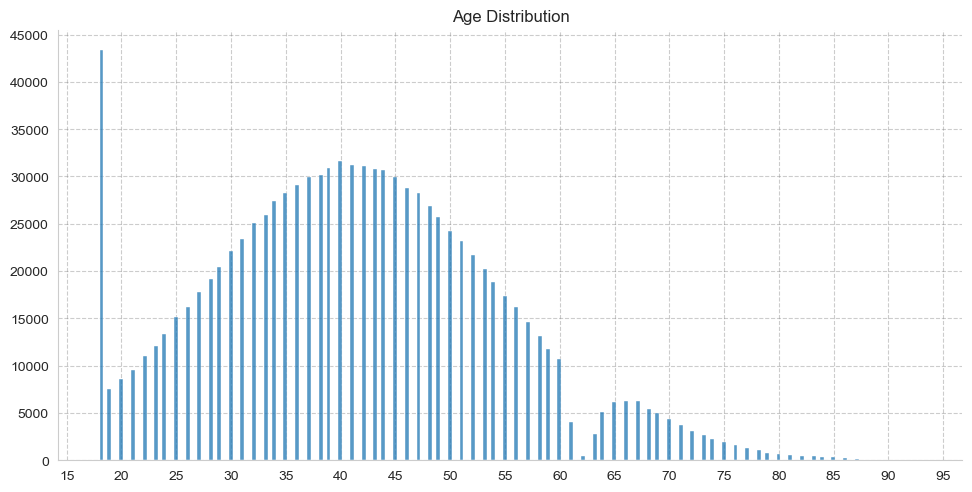

In [89]:
fig = sns.displot(plot_df, x='user_age', height=5, aspect=2)

fig.set(xlabel='Age', ylabel='Number of users')

plt.xlabel('')
plt.ylabel('')
plt.title('Age Distribution')
plt.yticks(np.arange(0, 45001, 5000))
plt.xticks(np.arange(15, 96, 5))
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.4)
plt.show()
plt.close()

We can see that the average age of the user base is 42.3 years.<br>
This diagram shows us that the age group between 61 and 64 is not as strongly represented as a normal distribution would indicate. Also we can see that we have a lot of young users under 20 years old.<br><br>
Lets have a look on the young users.<br><br>
First lets create a top tier list dependend on age:

In [91]:
query = """

WITH user_age AS (
    SELECT
            user_id,
            EXTRACT(YEAR FROM (SELECT MAX(return_time) FROM flights)) - EXTRACT(YEAR FROM birthdate) AS user_age

    FROM users
    GROUP BY user_id
)

SELECT
        user_age,
        COUNT(user_age),
        ROUND((COUNT(user_age)::NUMERIC / (SELECT COUNT(*) FROM users))*100, 2) AS perc_from_total

FROM user_age
GROUP BY user_age
ORDER BY count DESC
LIMIT 5

"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


user_age  count  perc_from_total
0      18.0  43360             4.25
1      40.0  31641             3.10
2      41.0  31179             3.05
3      42.0  31135             3.05
4      39.0  30914             3.03

As we can see, the number of users with an age of 18 represent most users in this dataset. Also with more than 1% difference to the 2nd most age.

Now lets look up the numbers for sign ups for each year and grouped by the age of users under 19 years old:

In [93]:
query = """

WITH user_age AS (
    SELECT
            user_id,
            EXTRACT(YEAR FROM sign_up_date) - EXTRACT(YEAR FROM birthdate) AS user_age_sign_up,
            EXTRACT(YEAR FROM sign_up_date) AS sign_up_year

    FROM users
    GROUP BY user_id
)

SELECT
        user_age_sign_up,
        sign_up_year,
        COUNT(DISTINCT user_id)
FROM user_age
WHERE user_age_sign_up <= 19
GROUP BY sign_up_year, user_age_sign_up

ORDER BY sign_up_year, user_age_sign_up
"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


user_age_sign_up  sign_up_year  count
0               15.0        2021.0   3237
1               16.0        2021.0    596
2               17.0        2021.0    640
3               18.0        2021.0    715
4               19.0        2021.0    832
5               16.0        2022.0  18161
6               17.0        2022.0   3051
7               18.0        2022.0   3623
8               19.0        2022.0   4000
9               17.0        2023.0  21962
10              18.0        2023.0   3850
11              19.0        2023.0   4356

It seems like that starting 2022 a lot of younger users are signing
up in the app. We should figure out why there is this trend in the younger generations to use "Travle Tide". <br>
**Interesting to see is that sign ups from 15-16 years old disappeared in 2023 and sign ups from 15 years old in 2022. That shows us, that the birth year of 2006 has a trend in using our app. (2023 - 17 = 2006)**

**Looking up the most popular hotels:**

In [96]:
query = """

WITH hotel_cleaned AS (

    SELECT
            *,
            CASE WHEN nights = 0 THEN 1
                 ELSE nights
            END AS nights_cleaned
    FROM hotels
    WHERE nights >= 0

    )

SELECT
        SPLIT_PART(hotel_name,' - ', 1) AS hotel_name,
        SPLIT_PART(hotel_name,' - ', 2) AS hotel_city,
        COUNT(trip_id) AS number_of_trips,
        ROUND(AVG(hotel_per_room_usd::NUMERIC * rooms * nights_cleaned),2) AS avg_costs_per_trip,
        ROUND(AVG(nights_cleaned),2) AS avg_nights_per_trip

FROM hotel_cleaned
GROUP BY hotel_name, hotel_city

ORDER BY number_of_trips DESC
LIMIT 10

"""

display(pd.read_sql(text(query),connection))

hotel_name hotel_city  number_of_trips  avg_costs_per_trip  \
0     Extended Stay    new york            13984              907.24   
1          Radisson    new york            13979              925.75   
2          Starwood    new york            13937              912.89   
3            Conrad    new york            13933              899.00   
4           Rosewood   new york            13925              920.63   
5         Shangri-La   new york            13875              889.88   
6  InterContinental    new york            13872              890.66   
7       Banyan Tree    new york            13870              917.72   
8       Best Western   new york            13855              944.52   
9       Aman Resorts   new york            13850              914.08   

   avg_nights_per_trip  
0                 4.16  
1                 4.27  
2                 4.24  
3                 4.22  
4                 4.26  
5                 4.21  
6                 4.24  
7                 4.22  
8                 4.26  
9                 4.19

The top 10 most booked hotels are all in New York.
For each numeric value that is shown in our DataFrame we can't see big differences between these top 10 hotels

**Looking up the most booked cities:**

In [99]:
query = """

-- creating a top 10 list of hotel cities

WITH top_cities AS (
    SELECT
        SPLIT_PART(hotel_name,' - ', 2) AS hotel_city,
        COUNT(trip_id) AS total_trips
    FROM hotels
    JOIN sessions
    USING(trip_id)
    GROUP BY hotel_city
    ORDER BY total_trips DESC
    LIMIT 10
)

SELECT
    SPLIT_PART(hotel_name,' - ', 2) AS hotel_city,
    CASE
        WHEN EXTRACT(MONTH FROM session_start) BETWEEN 3 AND 5 THEN 'Spring'
        WHEN EXTRACT(MONTH FROM session_start) BETWEEN 6 AND 8 THEN 'Summer'
        WHEN EXTRACT(MONTH FROM session_start) BETWEEN 9 AND 11 THEN 'Autumn'
        ELSE 'Winter'
    END AS season,
    COUNT(trip_id) AS number_of_trips
FROM hotels
JOIN sessions
USING(trip_id)
WHERE SPLIT_PART(hotel_name,' - ', 2) IN (SELECT
                                              hotel_city
                                          FROM top_cities)
GROUP BY hotel_city, season
ORDER BY hotel_city, season


"""

plot_df = pd.DataFrame()
plot_df = pd.read_sql(text(query),connection)

# Pivot the data so that we have one column for each season

pivot_df = pd.DataFrame()
pivot_df = plot_df.pivot(index='hotel_city', columns='season', values='number_of_trips').fillna(0)

pivot_df = pivot_df.reset_index()

pivot_df['total_trips'] = pivot_df[['Spring', 'Summer', 'Autumn', 'Winter']].sum(axis=1)
pivot_df = pivot_df.sort_values(by='total_trips', ascending=False)
display(pivot_df)
pivot_df = pivot_df.drop(columns='total_trips')

season    hotel_city  Autumn  Spring  Summer  Winter  total_trips
4           new york   35449   91846   73311   80907       281513
2        los angeles   17990   46629   36796   40536       141951
9            toronto   13072   33276   26773   29330       102451
0            chicago   12607   31992   25515   28444        98558
1            houston   10600   26875   21914   24123        83512
3           montreal    8100   21139   16664   18338        64241
5       philadelphia    7196   18937   14989   16462        57584
6            phoenix    7221   18762   14760   16283        57026
7        san antonio    6865   17704   13993   15484        54046
8          san diego    6546   16791   13429   14648        51414

<Figure size 1000x700 with 0 Axes>

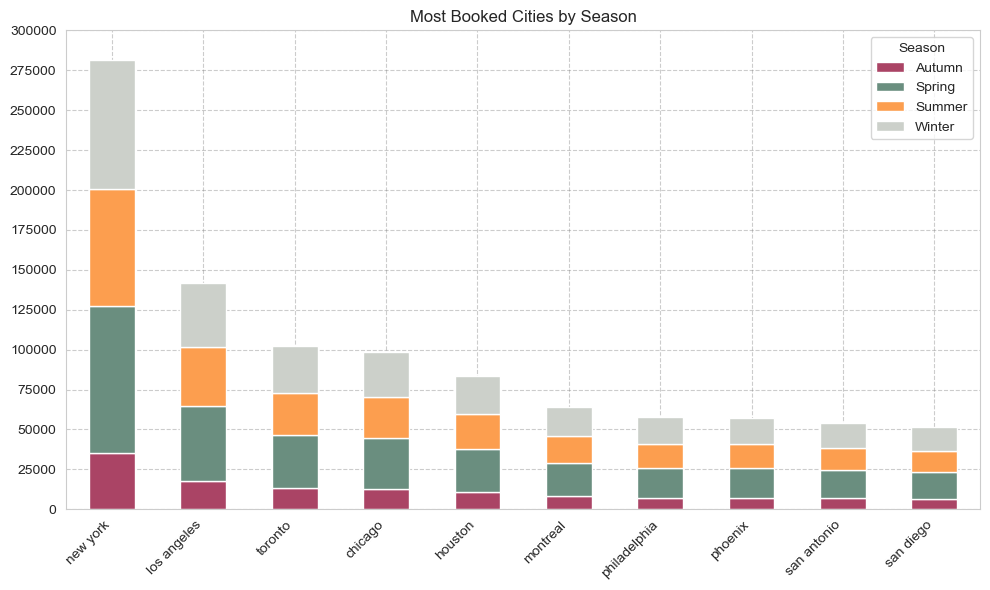

In [100]:
colors = ['#AA4465','#6A8E7F','#FC9E4F','#CCD0CA']

plt.figure(figsize=(10, 7))
ax = pivot_df.set_index('hotel_city').plot(kind='bar', stacked=True, color=colors, figsize=(10, 6))

# Add labels and titles

plt.xlabel('')
plt.ylabel('')
plt.title('Most Booked Cities by Season')
plt.xticks(rotation=45, ha='right')
plt.yticks(np.arange(0, 300001, 25000))
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.4)

# Add a legend to show what each color represents

plt.legend(title='Season', loc='upper right')

# Show the plot

plt.tight_layout()
plt.show()
plt.close()

As we can see, New York is the most booked city with a large gap to the second most booked city, Los Angeles.

**Looking up most expensive hotels in average per season:**

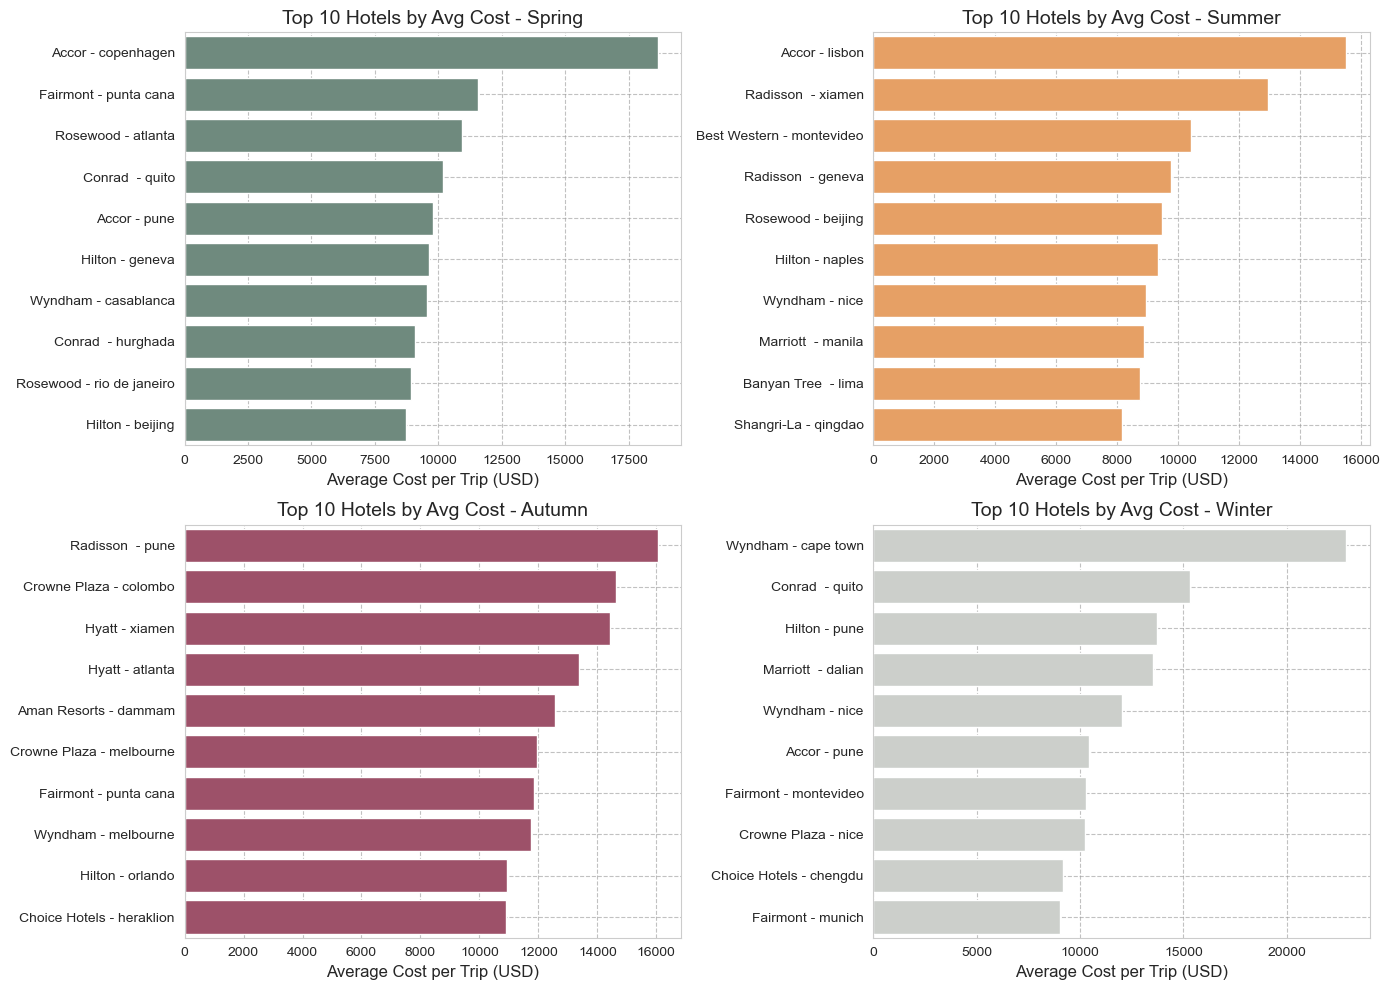

In [103]:
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, season in enumerate(seasons):

    query = f"""
    WITH hotel_cleaned AS (

        SELECT
                *,

                -- Set nights column values according "Travel Tide's" DB team
                CASE WHEN nights <= 0 THEN 1
                     ELSE nights
                END AS nights_cleaned
        FROM hotels
    ),

    hotel_avg_costs AS (

        SELECT
            hotel_name,
          	CASE
                  WHEN EXTRACT(MONTH FROM session_start) BETWEEN 3 AND 5 THEN 'Spring'
                  WHEN EXTRACT(MONTH FROM session_start) BETWEEN 6 AND 8 THEN 'Summer'
                  WHEN EXTRACT(MONTH FROM session_start) BETWEEN 9 AND 11 THEN 'Autumn'
                  ELSE 'Winter'
            END AS season,
            ROUND(AVG(hotel_per_room_usd::NUMERIC * rooms * nights_cleaned),2) AS avg_costs_per_trip
        FROM hotel_cleaned
        JOIN sessions
        USING(trip_id)
        GROUP BY hotel_name, season
        ORDER BY season, avg_costs_per_trip DESC
    )

    SELECT
        hotel_name,
        season,
        avg_costs_per_trip
    FROM hotel_avg_costs
    WHERE season = '{season}'
    LIMIT 10;
    """

    plot_df = pd.read_sql(text(query), connection)

    # Create a barplot with a different color for each season

    if season == 'Spring':
        sns.barplot(data=plot_df, x='avg_costs_per_trip', y='hotel_name', ax=axes[i], color='#6A8E7F')
    elif season == 'Summer':
        sns.barplot(data=plot_df, x='avg_costs_per_trip', y='hotel_name', ax=axes[i], color='#FC9E4F')
    elif season == 'Autumn':
        sns.barplot(data=plot_df, x='avg_costs_per_trip', y='hotel_name', ax=axes[i], color='#AA4465')
    else:
        sns.barplot(data=plot_df, x='avg_costs_per_trip', y='hotel_name', ax=axes[i], color='#CCD0CA')

    # Set title and labels for each subplot

    axes[i].set_title(f'Top 10 Hotels by Avg Cost - {season}', fontsize=14)
    axes[i].set_xlabel('Average Cost per Trip (USD)', fontsize=12)
    axes[i].set_ylabel('')

    # Optional: Customize the style and grid
    axes[i].grid(True, linestyle='--', alpha=0.6)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
plt.close(fig)

Here we can see that in average a winter trip will cost more than in other seasons. Also it is interesting to see, that no domestic hotel (USA/Canada) is in this top 10 list for hotels in each season. <br>
This information could be useful later on.

**Looking up most used airlines in the last 6 months given by data:**

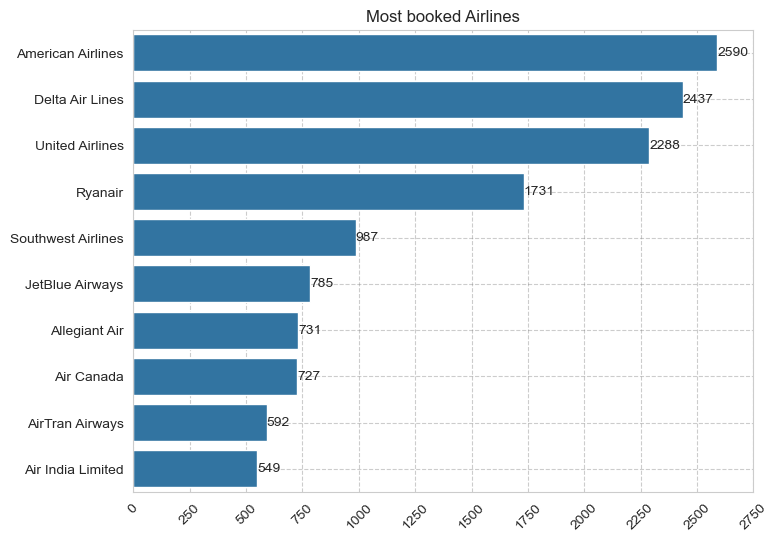

In [106]:
query = """

SELECT
        trip_airline,
        COUNT(trip_id)
FROM flights
WHERE departure_time > (SELECT MAX(departure_time) FROM flights) - INTERVAL '6 months'

GROUP BY trip_airline
ORDER BY count DESC

LIMIT 10

"""

plot_df = pd.DataFrame()
plot_df = pd.read_sql(text(query),connection)

plt.figure(figsize=(8, 6))

sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=plot_df, y='trip_airline', x='count')
ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('')
plt.ylabel('')
plt.title('Most booked Airlines')
plt.xticks(np.arange(0, 2751, 250), rotation = 45)
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.4)
plt.show()
plt.close()


The top 4 airlines are 'American Airlines', 'Delta Air Lines', 'United Airlines' and 'Ryanair'. All of them are leading this ranking with a big difference to the 5ht place.

**Looking up average seats booked per flight:**

In [109]:
query = """

SELECT
        ROUND(AVG(seats)::NUMERIC, 2) AS avg_seats

FROM flights

LIMIT 10

"""

print('Result Full Query')
display(pd.read_sql(text(query),connection))

Result Full Query


avg_seats
0       1.25

Most of the flights seems to have only one booked seats, also we should have in mind, that we used the average and not the median. So outliers could move away the average from the median.

**Looking up from which cities most of the users come from**

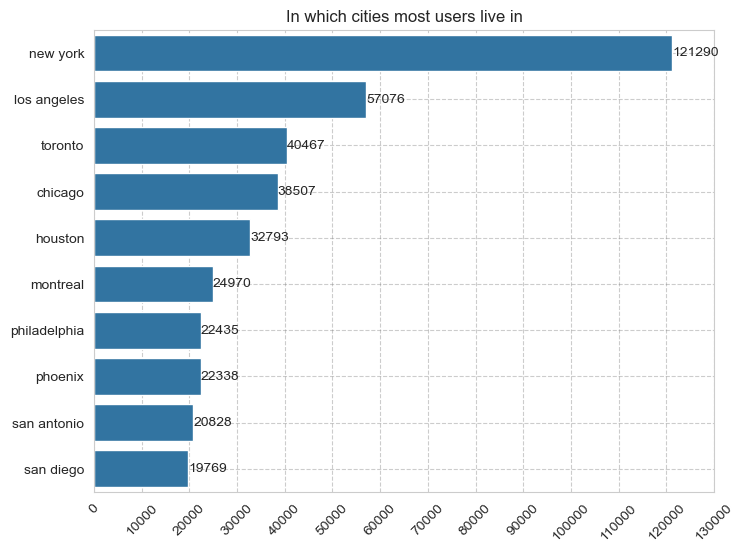

In [112]:
query = """

SELECT
        home_city,
        COUNT(user_id) AS num_users

FROM users
GROUP BY home_city
ORDER BY num_users DESC

LIMIT 10

"""

plot_df = pd.DataFrame()
plot_df = pd.read_sql(text(query),connection)

plt.figure(figsize=(8, 6))

sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.barplot(data=plot_df, y='home_city', x='num_users')
ax.bar_label(ax.containers[0], fontsize=10)

plt.xlabel('')
plt.ylabel('')
plt.title('In which cities most users live in')
plt.xticks(np.arange(0, 130001, 10000), rotation = 45)
plt.grid(True, which='both', axis='both', linestyle='--', color='grey', alpha=0.4)
plt.show()
plt.close()

New York and Los Angeles are the two cities at the top of our chart.

**Whats the shortest session that booked a trip?**

In [115]:
query = """

WITH time_sessions AS (

        SELECT
                (session_end - session_start) AS session_time

        FROM sessions

        WHERE trip_id IS NOT NULL
        ORDER BY session_time ASC

    )

SELECT
        TO_CHAR(session_time, 'MI:SS') AS session_time

FROM time_sessions

LIMIT 5

"""

display(pd.read_sql(text(query),connection))

session_time
0        00:49
1        00:50
2        00:50
3        00:50
4        00:50

The shortest session that booked a trip hab 49 seconds. This we can use to filter out sessions that are too short to be counted as a real usage session of the app.

Lets look how many sessions had less than 5 seconds and decide then if we want to add this to our overall filters

In [117]:
query = """

WITH time_sessions AS (

        SELECT
                EXTRACT(EPOCH FROM session_end) - EXTRACT(EPOCH FROM session_start) AS session_time

        FROM sessions
    )

SELECT
        COUNT(*)

FROM time_sessions
WHERE session_time < 5

"""

display(pd.read_sql(text(query),connection))

count
0      7


Okay, that number is too low to be set as a filter condition.

# Creating session base table to work with

We will now beginn to create a session based DataFrame with all filters set that "Travel Tide" wants. The filters are:
<br>
- Only sessions after '2023-01-04' should be included, to only use the most actual data we were given. <br>
- Only users that had >= 8 sessions after this date

In [121]:
base_table = pd.DataFrame()

query = """

SELECT
        *
FROM users u
LEFT JOIN sessions s
USING(user_id)
LEFT JOIN hotels h
USING(trip_id)
LEFT JOIN flights f
USING(trip_id)

-- We need to filter by date two times. First in our subquery to only count sessions after '2023-01-04',
-- than again after joining every table, because there could be older sessions by users who had 8 and
-- more sessions, after '2023-01-04'.

WHERE s.session_start > '2023-01-04' AND s.user_id in (
                                                       SELECT
                                                            DISTINCT user_id
                                                       FROM sessions
                                                       WHERE session_start > '2023-01-04'
                                                       GROUP BY user_id
                                                       HAVING COUNT(*)>=8)
"""

base_table = pd.read_sql(text(query),connection)
base_table.head()

trip_id  user_id   birthdate gender  \
0  529436-9c9becf56b874e9b9e867794555b9724   529436  1977-05-10      F   
1  512628-857fed4132c64aa188ae3c28245f8dc6   512628  1989-03-02      F   
2  505414-48b71a47cdc34a1d87ce499183b76a09   505414  1976-06-16      F   
3  558920-5720f88bf88740b58c67d518d1345876   558920  1979-08-07      F   
4  576612-00901759d9fe4ab083528f542668b38f   576612  1986-02-13      F   

   married  has_children home_country home_city home_airport  \
0    False         False          usa  new york          LGA   
1    False         False       canada  winnipeg          YAV   
2     True         False          usa    boston          BOS   
3    False         False          usa   houston          IAH   
4    False         False          usa    austin          AUS   

   home_airport_lat  ...  destination_airport seats return_flight_booked  \
0            40.777  ...                  DET   1.0                 True   
1            50.056  ...                 None   NaN                 None   
2            42.364  ...                  LUF   1.0                 True   
3            29.980  ...                  JFK   1.0                 True   
4            30.194  ...                  LOU   4.0                 True   

       departure_time         return_time  checked_bags       trip_airline  \
0 2023-01-23 10:00:00 2023-01-26 10:00:00           0.0            Ryanair   
1                 NaT                 NaT           NaN               None   
2 2023-01-31 07:00:00 2023-02-08 07:00:00           0.0    Delta Air Lines   
3 2023-02-03 07:00:00 2023-02-07 07:00:00           1.0  American Airlines   
4 2023-02-15 15:00:00 2023-02-21 15:00:00           0.0    United Airlines   

   destination_airport_lat  destination_airport_lon  base_fare_usd  
0                   42.409                  -83.010         139.45  
1                      NaN                      NaN            NaN  
2                   33.535                 -112.383         654.05  
3                   40.640                  -73.779         413.70  
4                   38.228                  -85.664        1043.84  

[5 rows x 41 columns]

**Lets look up all column types to be sure everything is as intended**

In [123]:
base_table.dtypes

trip_id                            object
user_id                             int64
birthdate                          object
gender                             object
married                              bool
has_children                         bool
home_country                       object
home_city                          object
home_airport                       object
home_airport_lat                  float64
home_airport_lon                  float64
sign_up_date                       object
session_id                         object
session_start              datetime64[ns]
session_end                datetime64[ns]
flight_discount                      bool
hotel_discount                       bool
flight_discount_amount            float64
hotel_discount_amount             float64
flight_booked                        bool
hotel_booked                         bool
page_clicks                         int64
cancellation                         bool
hotel_name                        

In [124]:
list_columns_type_change = ['birthdate',
                            'sign_up_date']

print('---------------------------------------------')

for element in list_columns_type_change:
    base_table[element] = base_table[element].astype('datetime64[ns]')
    print(f"{element}: {base_table[element].dtypes}")

print('---------------------------------------------')

---------------------------------------------
birthdate: datetime64[ns]
sign_up_date: datetime64[ns]
---------------------------------------------


**Now lets manipulate the data and add some columns needed**

Starting with cleaning the hotel_name column to be split up to hotel_naming and hotel_city.

In [127]:
base_table[['hotel_naming','hotel_city']] = base_table['hotel_name'].str.split(' - ', expand=True)
base_table[['hotel_naming','hotel_city']].head(2)

hotel_naming hotel_city
0  Banyan Tree     detroit
1        Hilton   new york

The nights column also must be adjusted. <br>
* All 0 values for nights needs to be set to 1, because we will multipy with this number later on.
There are 0 values for users that only checked in for a few hours. Still they spent money for the hotel room.<br>
* All negative numbers needs to be set to 1. We got this information from the "Travel Tide" DB team.

In [129]:
base_table.loc[base_table['nights'] <= 0, 'nights'] = 1
base_table['nights'].min()

1.0

Adding age by sign up and user age as a column:

In [131]:
base_table['age'] = pd.to_datetime('today').normalize().year - pd.DatetimeIndex(base_table['birthdate']).year
base_table['age_by_sign_up'] = pd.DatetimeIndex(base_table['sign_up_date']).year - pd.DatetimeIndex(base_table['birthdate']).year
base_table[['age_by_sign_up','age']].head(1)

age_by_sign_up  age
0              46   47

Adding costs per seat to the base table:<br>
*(We do not need to look out for NaN values in this calculation, because if there are NaN values, both column values 'base_fare_usd' and 'seats' will be NaN.)*

In [133]:
base_table['costs_per_seat'] = (base_table['base_fare_usd'] / base_table['seats']).round(2)
base_table['costs_per_seat'].head(2)

0    139.45
1       NaN
Name: costs_per_seat, dtype: float64

Adding columns for flight distances between home and destination airport:

In [135]:
# Define a function to calculate haversine distance

def haversine(lat1, lon1, lat2, lon2):

    # Earth's radius in kilometers

    R = 6371.0

    # Convert degrees to radians

    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Differences in coordinates

    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula

    a = np.sin(dlat / 2)**2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    # Distance in kilometers

    distance = R * c
    return distance

# Apply the haversine function row-wise in the DataFrame

base_table['flight_distance_km'] = base_table.apply(lambda row: haversine(row['home_airport_lat'],
                                                          row['home_airport_lon'],
                                                          row['destination_airport_lat'],
                                                          row['destination_airport_lon']), axis=1).round(2)

base_table['flight_distance_km'].head(2)

0    780.86
1       NaN
Name: flight_distance_km, dtype: float64

Adding a column that represents session lenghts:

In [137]:
base_table['session_duration'] = base_table['session_end'] - base_table['session_start']
base_table['session_duration'].head(2)

0   0 days 00:02:06
1   0 days 00:01:29
Name: session_duration, dtype: timedelta64[ns]

Adding trip time lengths:<br>
*(In this calculation there could be a possibility that 'return_time' will be a NaT value, but then the 'trip_time' value will also be NaT. <br>
This is okay, because we don't have another data to get a meaningful value for this situation.)*

In [139]:
base_table['trip_time'] = base_table['return_time'] - base_table['departure_time']
base_table['trip_time'].head(2)

0   3 days
1      NaT
Name: trip_time, dtype: timedelta64[ns]

Changing type of 'trip_time' and 'session_duration' to float type because we want to aggregate them in the user table and with the timedelta64 format we will maybe get errors later on.

In [141]:
base_table['session_duration_min'] = base_table['session_duration'].dt.total_seconds() / 60.0
base_table['trip_time_day'] = base_table['trip_time'].dt.total_seconds() / 86400.0
base_table[['session_duration_min','trip_time_day']].head(2)

session_duration_min  trip_time_day
0              2.100000            3.0
1              1.483333            NaN

Adding checked bags per seat:<br>
*(We do not need to look out for NaN values in this calculation, because if there are NaN values, both column values 'checked_bags' and 'seats' will be NaN.)*

In [143]:
base_table['checked_bags_per_seat'] = base_table['checked_bags'] / base_table['seats']
base_table['checked_bags_per_seat'].head(2)

0    0.0
1    NaN
Name: checked_bags_per_seat, dtype: float64

Adding boolean column for discounts:

In [145]:
base_table['discount_bool'] = (base_table['hotel_discount'] == True) | (base_table['flight_discount'] == True)
base_table['discount_bool'].head(2)

0    False
1     True
Name: discount_bool, dtype: bool

Adding total hotel spent as a column:<br>
*(We do not need to look out for NaN values in this calculation, because if there are NaN values, the column values 'hotel_per_room_usd', 'nights' and 'rooms' will be NaN.)*

In [147]:
base_table['total_cost_hotel'] = (base_table['hotel_per_room_usd'] * base_table['nights']*base_table['rooms'])
base_table['total_cost_hotel'].head(2)

0     720.0
1    1990.0
Name: total_cost_hotel, dtype: float64

Adding total spent as a column:<br>
*(Here we need to look out for NaN values in our calculation, because there could be the case, that a user booked a flight but no hotel, or the other way around.)*

In [149]:
base_table['total_cost'] = base_table[['base_fare_usd', 'total_cost_hotel']].sum(axis=1, skipna=True)
base_table['total_cost'].head(2)

0     859.45
1    1990.00
Name: total_cost, dtype: float64

**We don't need to add a calculation for the total flight costs, because this is represented by the column named 'base_fare_usd'.**

**Now we can drop some columns so that our session base table, 'base_table', will get a little bit smaller:**<br>
* *'home_airport_lat'*, *'home_airport_lon'*, *'destination_airport_lat'*, *'destination_airport_lon'* can be dropped because we have our column 'flight_distance_km' that represents the usefull data out of these 4 columns
* *'birthdate'* can be dropped because we calculated the age of each user and therefore don't need this information anymore
* *'session_start'* and *'session_end'* are also not needed anymore, because we calculated the difference of these two columns and use this value
* The same goes for *'check_in_time'* and *'check_out_time'*
* *'hotel_name'* can be dropped, becaue we splitted the information inside this column into two new columns to seperate the hotel name and the hotel city
* *'destination_airport'* and *'home_airport'* aren't needed in this analysis and will get dropped.
* *'departure_time'* and *'return_time'* will also be dropped, because we calculated the overall trip time with these columns

In [152]:
list_unwanted_columns = ['home_airport_lat',
                         'home_airport_lon',
                         'destination_airport_lat',
                         'destination_airport_lon',
                         'departure_time',
                         'return_time',
                         'birthdate',
                         'session_start',
                         'session_end',
                         'check_in_time',
                         'check_out_time',
                         'hotel_name',
                         'destination_airport',
                         'home_airport']

for element in list_unwanted_columns:
    base_table = base_table.drop(element, axis=1)           # axis 1 for columns, 0 for rows

**Now we can have a look into every numeric data of our session DataFrame:**

In [154]:
base_table.describe().T

count                           mean  \
user_id                 49211.0                  545282.694946   
sign_up_date              49211  2023-01-20 00:56:58.357684480   
flight_discount_amount   8282.0                       0.139864   
hotel_discount_amount    6205.0                       0.112192   
page_clicks             49211.0                      17.588791   
nights                  14726.0                       3.770474   
rooms                   14726.0                       1.194554   
hotel_per_room_usd      14726.0                      177.93739   
seats                   14270.0                       1.215207   
checked_bags            14270.0                       0.592922   
base_fare_usd           14270.0                      525.90139   
age                     49211.0                      42.346122   
age_by_sign_up          49211.0                      41.231249   
costs_per_seat          14270.0                     404.000307   
flight_distance_km      14270.0                    2314.476309   
session_duration          49211      0 days 00:03:07.252328681   
trip_time                 13652      4 days 10:18:06.434222092   
session_duration_min    49211.0                       3.120872   
trip_time_day           13652.0                       4.429241   
checked_bags_per_seat   14270.0                       0.512034   
total_cost_hotel        14726.0                     815.152044   
total_cost              49211.0                     396.426446   

                                        min                  25%  \
user_id                             23557.0             517119.0   
sign_up_date            2021-07-22 00:00:00  2023-01-08 00:00:00   
flight_discount_amount                 0.05                  0.1   
hotel_discount_amount                  0.05                 0.05   
page_clicks                             1.0                  6.0   
nights                                  1.0                  1.0   
rooms                                   1.0                  1.0   
hotel_per_room_usd                     17.0                 99.0   
seats                                   1.0                  1.0   
checked_bags                            0.0                  0.0   
base_fare_usd                          2.41             200.4325   
age                                    18.0                 35.0   
age_by_sign_up                         16.0                 34.0   
costs_per_seat                         2.41             183.0175   
flight_distance_km                    17.67              1067.27   
session_duration            0 days 00:00:06      0 days 00:00:45   
trip_time                   0 days 00:00:00      2 days 00:00:00   
session_duration_min                    0.1                 0.75   
trip_time_day                           0.0                  2.0   
checked_bags_per_seat                   0.0                  0.0   
total_cost_hotel                       17.0                197.0   
total_cost                              0.0                  0.0   

                                        50%                  75%  \
user_id                            540308.0             573922.0   
sign_up_date            2023-01-19 00:00:00  2023-02-05 00:00:00   
flight_discount_amount                  0.1                  0.2   
hotel_discount_amount                   0.1                 0.15   
page_clicks                            13.0                 22.0   
nights                                  2.0                  5.0   
rooms                                   1.0                  1.0   
hotel_per_room_usd                    148.0                222.0   
seats                                   1.0                  1.0   
checked_bags                            1.0                  1.0   
base_fare_usd                       381.765             600.6325   
age                                    43.0                 50.0   
age_by_sign_up                         42.0               

User related columns are:<br>


*   user_id
*   sign_up_date
*   page_clicks
*   age
*   age_by_sign_up
*   session_duration
*   trip_time
*   total_cost
<br>

Hotel related columns are:<br>

*   hotel_discount_amount
*   nights
*   rooms
*   hotel_per_room_usd
*   total_cost_hotel
<br>

Flight related columns are:<br>

*   flight_discount_amount
*   seats
*   checked_bags
*   base_fare_usd
*   costs_per_seat
*   flight_distance_km
*   checked_bags_per_seat


# Creating a user based table

Lets start with creating a empty DataFrame and add unique user_ids from our base_table to it:

In [158]:
user_base_table = pd.DataFrame()
user_base_table = pd.DataFrame(base_table['user_id'].unique(), columns=['user_id'])
user_base_table.head(2)

user_id
0   529436
1   512628

Adding user related columns to our user base DataFrame:<br><br>
We won't add following columns because we think that there is not enough data to back up an analysis with these column values:<br>
*   'gender', we have the information what gender each user has but we can't connect this information with another data value, so we assume only humans in general. This could be different in the future, when we will have more data points.
*   'married', here we have a similar case to gender, because we can't connect this information with another data point in this dataset (i.e. if a trip is booked for a married couple or not is not shown), we will not use tis information
*   'has_children', it is like the 'married' column
<br>

*(We will also show later on that the avgerage booked seat per flight for most users will be mostly sitting between 1 and 1.25. So even if there are family trips or trips with children, what we can't see in the data, we can just assume, than there are only a few possible trips compared to all the trips taken)*

In [160]:
list_of_unique_columns = ['home_country',
                          'home_city',
                          'sign_up_date',
                          'age',
                          'age_by_sign_up']

for element in list_of_unique_columns:
    user_base_table = user_base_table.merge(base_table.groupby('user_id')[element].first().reset_index(),
                                            on='user_id',
                                            how='left')

user_base_table.head(2)

user_id home_country home_city sign_up_date  age  age_by_sign_up
0   529436          usa  new york   2023-01-14   47              46
1   512628       canada  winnipeg   2023-01-05   35              34

Adding number of booked trips with cancellations:<br>
Here we need to create a list of trip_ids that have a 'True' value in 'cancellation' to get only the trip_ids which where cancelled.

In [162]:
cancelled_trip_ids = pd.DataFrame()
filtered_base_table = pd.DataFrame()

cancelled_trip_ids = base_table.loc[base_table['cancellation'] == True, 'trip_id'].unique()
filtered_base_table = base_table.loc[base_table['trip_id'].isin(cancelled_trip_ids)]


# Count the unique trip_ids for cancellations per user
user_base_table = user_base_table.merge(filtered_base_table.groupby('user_id')['trip_id'].nunique().reset_index(name='num_trip_cancel'),
                                        on='user_id',
                                        how='left')
user_base_table.head(2)

user_id home_country home_city sign_up_date  age  age_by_sign_up  \
0   529436          usa  new york   2023-01-14   47              46   
1   512628       canada  winnipeg   2023-01-05   35              34   

   num_trip_cancel  
0              NaN  
1              NaN

Adding num of sessions/trips:

In [164]:
list_nunique_columns = ['trip_id',
                        'session_id']

for element in list_nunique_columns:
    user_base_table = user_base_table.merge(base_table.groupby('user_id')[element].nunique().reset_index(name='num_'+element),
                                            on='user_id',
                                            how='left')

Adding total trips without cancellation:

In [166]:
cancelled_trip_ids = base_table.loc[base_table['cancellation'] == True, 'trip_id'].unique()
none_cancelled_trip_ids = base_table.loc[(~base_table['trip_id'].isin(cancelled_trip_ids))]

user_base_table = user_base_table.merge(none_cancelled_trip_ids.groupby('user_id')['trip_id'].nunique().reset_index(name='total_trips_wc'),
                                            on='user_id',
                                            how='left')

In [167]:
base_table['trip_time'].dtype

dtype('<m8[ns]')

Adding aggregated (SUM/AVG) columns:

In [169]:
list_of_columns_sum =     ['nights',
                           'rooms',
                           'seats',
                           'checked_bags',
                           'flight_discount_amount',
                           'hotel_discount_amount',
                           'page_clicks',
                           'hotel_per_room_usd',
                           'base_fare_usd',
                           'costs_per_seat',
                           'session_duration_min',
                           'checked_bags_per_seat',
                           'trip_time_day',
                           'discount_bool',
                           'flight_booked',
                           'hotel_booked',
                           'total_cost',
                           'total_cost_hotel',
                           'flight_distance_km']

cancelled_trip_ids = base_table.loc[base_table['cancellation'] == True, 'trip_id'].unique()
none_cancelled_trip_ids = base_table.loc[(~base_table['trip_id'].isin(cancelled_trip_ids))]

for element in list_of_columns_sum:
    user_base_table = user_base_table.merge(none_cancelled_trip_ids.groupby('user_id')[element].sum().round(2).reset_index(name='sum_' + element),
                                            on='user_id',
                                            how='left')

list_of_columns_avg =     ['nights',
                           'rooms',
                           'seats',
                           'checked_bags',
                           'flight_discount_amount',
                           'hotel_discount_amount',
                           'page_clicks',
                           'hotel_per_room_usd',
                           'base_fare_usd',
                           'costs_per_seat',
                           'session_duration_min',
                           'checked_bags_per_seat',
                           'trip_time_day',
                           'flight_booked',
                           'flight_distance_km']

for element in list_of_columns_avg:
    user_base_table = user_base_table.merge(none_cancelled_trip_ids.groupby('user_id')[element].mean().round(2).reset_index(name='avg_' + element),
                                            on='user_id',
                                            how='left')

*Looking up the average seats per flight overall to backup our decision not to use some user related columns as described above*

In [171]:
user_base_table['avg_seats'].describe()

count    5045.000000
mean        1.185851
std         0.370976
min         1.000000
25%         1.000000
50%         1.000000
75%         1.250000
max         6.000000
Name: avg_seats, dtype: float64

Now that we have laid the foundation of the aggregated columns, we can add some metrics:

In [173]:
# Flight Hotel Rate
# Numbers > 1 standing for more flights than hotels booked. Numbers < 1 stands for more hotels booked, than flights.
# 1 means that the user has the same number of flights and hotels booked
user_base_table['r_flight_hotel_trip_rate'] = (user_base_table['sum_flight_booked'] / user_base_table['sum_hotel_booked']).round(2)

# Average Hotel Stay
user_base_table['r_avg_hotel_stay'] = (user_base_table['sum_nights'] / user_base_table['total_trips_wc']).round(2)

# Average Seats Booked
user_base_table['r_avg_seats_per_trip'] = (user_base_table['sum_seats'] / user_base_table['total_trips_wc']).round(2)

# Average Hotel Rooms
user_base_table['r_avg_hotel_rooms'] = (user_base_table['sum_rooms'] / user_base_table['total_trips_wc']).round(2)

# Average Spent
user_base_table['r_avg_spent'] = (user_base_table['sum_total_cost'] / user_base_table['total_trips_wc']).round(2)

# Average Flight Spent
user_base_table['r_avg_flight_spent'] = (user_base_table['sum_base_fare_usd'] / user_base_table['sum_flight_booked']).round(2)

# Average Flight Spent per KM and Seat
user_base_table['r_avg_flight_spent_per_km_per_seat'] = (user_base_table['sum_base_fare_usd'] / user_base_table['sum_flight_distance_km'] * \
                                                                                       user_base_table['sum_seats']).round(2)

# Average Hotel Spent
user_base_table['r_avg_hotel_spent'] = (user_base_table['sum_total_cost_hotel'] / user_base_table['sum_hotel_booked']).round(2)

# Average Hotel Spent per Night
user_base_table['r_avg_night_hotel_spent'] = (user_base_table['sum_total_cost_hotel'] / user_base_table['sum_nights']).round(2)

# Average Distance Flown
user_base_table['r_avg_distance_flown'] = (user_base_table['sum_flight_distance_km'] / user_base_table['sum_flight_booked']).round(2)

# Average Luggage
user_base_table['r_avg_luggage_per_flight'] = (user_base_table['sum_checked_bags'] / user_base_table['sum_flight_booked']).round(2)

# Rate of Discounts per Trip
user_base_table['r_num_trips_with_discounts'] = user_base_table['sum_discount_bool'] / user_base_table['total_trips_wc'].round(2)

# Average Flight Discount
user_base_table['r_avg_flight_discount'] = (user_base_table['sum_flight_discount_amount'] / user_base_table['sum_flight_booked']).round(2)

# Average Hotel Discount
user_base_table['r_avg_hotel_discount'] = (user_base_table['sum_hotel_discount_amount'] / user_base_table['sum_hotel_booked']).round(2)

# Session / Trip rate
user_base_table['r_purchase_rate'] = (user_base_table['num_session_id'] / user_base_table['total_trips_wc']).round(2)

# Creating a slimmed down user based dataframe

In [175]:
list_of_non_agg_columns = ['home_country',
                           'home_city',
                           'age',
                           'age_by_sign_up',
                           'sum_flight_booked',
                           'sum_hotel_booked',
                           'total_trips_wc',
                           'sum_total_cost',
                           'avg_page_clicks',
                           'avg_session_duration_min',
                           #'trip_time_day',
                           'r_flight_hotel_trip_rate',
                           'r_avg_hotel_stay',
                           'r_avg_seats_per_trip',
                           'r_avg_hotel_rooms',
                           'r_avg_spent',
                           'r_avg_flight_spent',
                           'r_avg_flight_spent_per_km_per_seat',
                           'r_avg_hotel_spent',
                           'r_avg_night_hotel_spent',
                           'r_avg_distance_flown',
                           'r_avg_luggage_per_flight',
                           'r_num_trips_with_discounts',
                           'r_avg_flight_discount',
                           'r_avg_hotel_discount',
                           'r_purchase_rate']

cr_user_df = pd.DataFrame()
cr_user_df = pd.DataFrame(user_base_table['user_id'].unique(), columns=['user_id'])

for element in list_of_non_agg_columns:
    cr_user_df = cr_user_df.merge(user_base_table.groupby('user_id')[element].first().reset_index(),
                                  on='user_id',
                                  how='left')

**Lets have a look on how our data is distributed:**

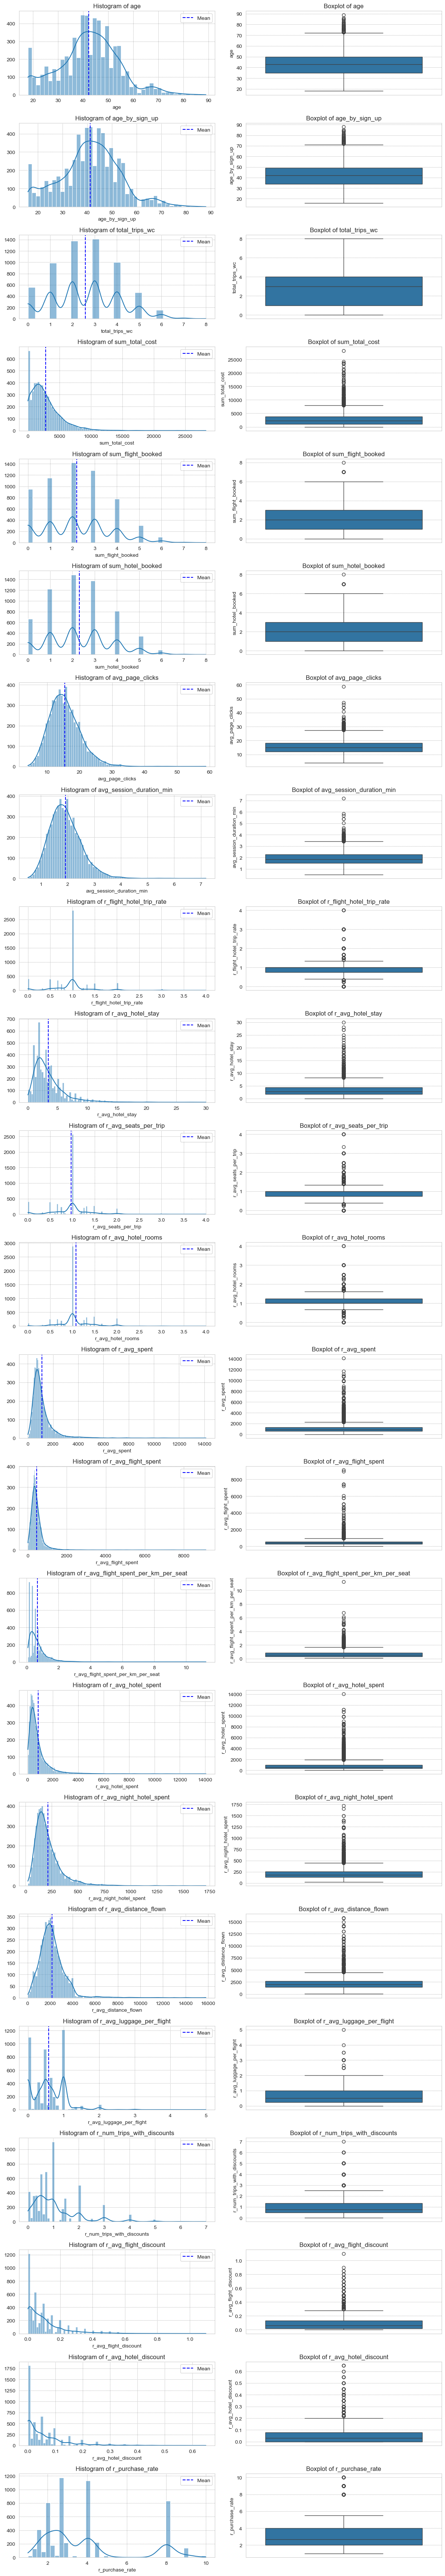

In [177]:
list_of_columns = ['age',
                   'age_by_sign_up',
                   'total_trips_wc',
                   'sum_total_cost',
                   'sum_flight_booked',
                   'sum_hotel_booked',
                   'avg_page_clicks',
                   'avg_session_duration_min',
                   'r_flight_hotel_trip_rate',
                   'r_avg_hotel_stay',
                   'r_avg_seats_per_trip',
                   'r_avg_hotel_rooms',
                   'r_avg_spent',
                   'r_avg_flight_spent',
                   'r_avg_flight_spent_per_km_per_seat',
                   'r_avg_hotel_spent',
                   'r_avg_night_hotel_spent',
                   'r_avg_distance_flown',
                   'r_avg_luggage_per_flight',
                   'r_num_trips_with_discounts',
                   'r_avg_flight_discount',
                   'r_avg_hotel_discount',
                   'r_purchase_rate']


fig, axes = plt.subplots(len(list_of_columns), 2, figsize=(12, 3 * len(list_of_columns)))

for i, element in enumerate(list_of_columns):

    mean = cr_user_df[element].mean()

    sns.histplot(data=cr_user_df, x=cr_user_df[element], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {element}')
    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i, 0].set_ylabel('')
    axes[i, 0].legend()

    sns.boxplot(y=cr_user_df[element], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {element}')


    plt.tight_layout()

plt.show()

**We can see that there are a lot of charts with right skewed data. Our plan is to create a scoring system that generates a number between 0 and 1 after combining all the metrics required for a perk. <br>
To get a better result when combining our metrics, we want them to be as close to a normal distribution as possible. Therefore, we will use the log and sqrt functions to make the right-skewed data look more like a normal distribution, and then we will convert all the data to values between 0 and 1 using the min max method.**

In [179]:
list_of_strong_right_skewed_data = ['r_avg_hotel_stay',
                                    'r_avg_seats_per_trip',
                                    'r_avg_spent',
                                    'r_avg_flight_spent',
                                    'r_avg_flight_spent_per_km_per_seat',
                                    'r_avg_hotel_spent',
                                    'r_avg_night_hotel_spent']

list_of_weak_right_skewed_data = [  'r_avg_hotel_rooms',
                                    'r_avg_luggage_per_flight',
                                    'r_num_trips_with_discounts',
                                    'r_avg_distance_flown',
                                    'avg_page_clicks',
                                    'avg_session_duration_min',
                                    'r_purchase_rate',
                                    'r_flight_hotel_trip_rate',
                                    'sum_total_cost',
                                    'r_avg_flight_discount',
                                    'r_avg_hotel_discount']

# Using log transformation on the strong skewed data

for element in list_of_strong_right_skewed_data:
    cr_user_df[element+'_log'] = np.log1p(cr_user_df[element])

    # drop old column
    cr_user_df = cr_user_df.drop(element, axis=1)

# We need to do a double log on this column to get is closer to a normal distribution
cr_user_df['r_avg_flight_spent_per_km_per_seat_log'] = np.log1p(cr_user_df['r_avg_flight_spent_per_km_per_seat_log'])



# Using square root transformation of the weak skewed data

for element in list_of_weak_right_skewed_data:
    cr_user_df[element+'_sqrt'] = np.sqrt(cr_user_df[element])

    # drop old column
    cr_user_df = cr_user_df.drop(element, axis=1)

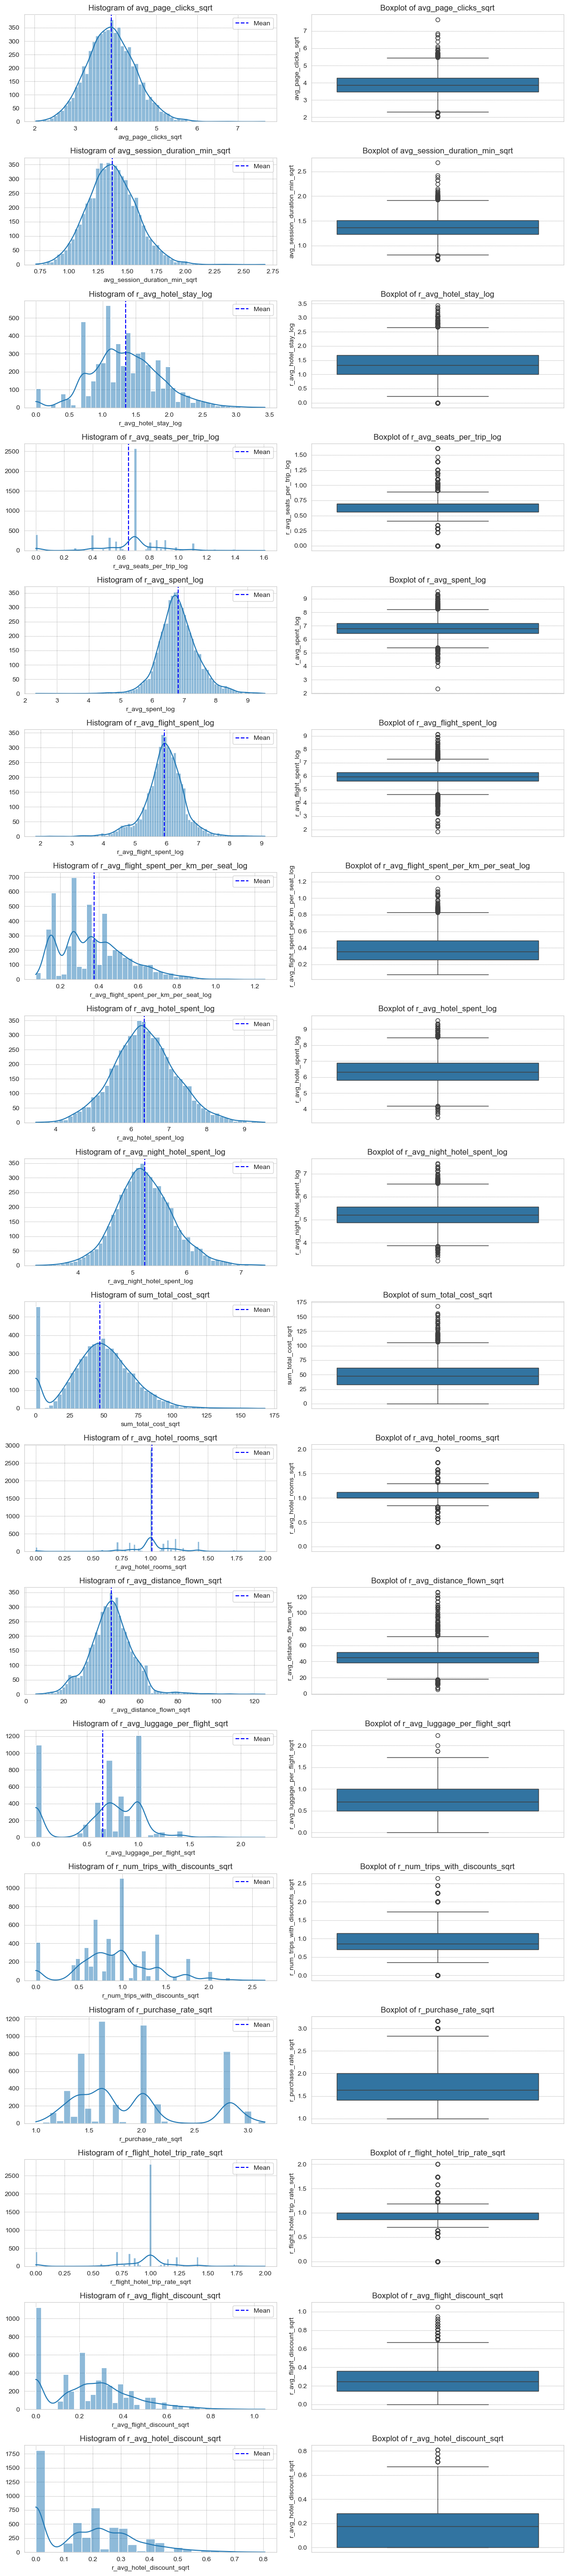

In [180]:
transformed_data_list = ['avg_page_clicks_sqrt',
                         'avg_session_duration_min_sqrt',
                         'r_avg_hotel_stay_log',
                         'r_avg_seats_per_trip_log',
                         'r_avg_spent_log',
                         'r_avg_flight_spent_log',
                         'r_avg_flight_spent_per_km_per_seat_log',
                         'r_avg_hotel_spent_log',
                         'r_avg_night_hotel_spent_log',
                         'sum_total_cost_sqrt',
                         'r_avg_hotel_rooms_sqrt',
                         'r_avg_distance_flown_sqrt',
                         'r_avg_luggage_per_flight_sqrt',
                         'r_num_trips_with_discounts_sqrt',
                         'r_purchase_rate_sqrt',
                         'r_flight_hotel_trip_rate_sqrt',
                         'r_avg_flight_discount_sqrt',
                         'r_avg_hotel_discount_sqrt']


fig, axes = plt.subplots(len(transformed_data_list), 2, figsize=(12, 3 * len(transformed_data_list)))

for i, element in enumerate(transformed_data_list):

    mean = cr_user_df[element].mean()

    sns.histplot(data=cr_user_df, x=cr_user_df[element], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {element}')
    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i, 0].set_ylabel('')
    axes[i, 0].legend()

    sns.boxplot(y=cr_user_df[element], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {element}')


    plt.tight_layout()

plt.show()

These histograms are looking way better. Before we start to normalize all our metrics we need to look for NaN and inf values and fill them up:

In [182]:
cr_user_df.describe().T

count          mean           std  \
user_id                                 5998.0  5.454407e+05  64924.749760   
age                                     5998.0  4.230694e+01     12.049824   
age_by_sign_up                          5998.0  4.119156e+01     12.061021   
sum_flight_booked                       5998.0  2.193565e+00      1.517519   
sum_hotel_booked                        5998.0  2.316772e+00      1.456966   
total_trips_wc                          5998.0  2.582361e+00      1.533290   
r_avg_hotel_stay_log                    5442.0  1.347685e+00      0.526251   
r_avg_seats_per_trip_log                5442.0  6.506865e-01      0.248382   
r_avg_spent_log                         5442.0  6.825210e+00      0.612904   
r_avg_flight_spent_log                  5045.0  5.928176e+00      0.643980   
r_avg_flight_spent_per_km_per_seat_log  5045.0  3.745874e-01      0.177591   
r_avg_hotel_spent_log                   5336.0  6.352759e+00      0.837248   
r_avg_night_hotel_spent_log             5336.0  5.226205e+00      0.534694   
r_avg_hotel_rooms_sqrt                  5442.0  1.013956e+00      0.221293   
r_avg_luggage_per_flight_sqrt           5045.0  6.526900e-01      0.390707   
r_num_trips_with_discounts_sqrt         5949.0           inf           NaN   
r_avg_distance_flown_sqrt               5045.0  4.508557e+01     11.991272   
avg_page_clicks_sqrt                    5998.0  3.887929e+00      0.601692   
avg_session_duration_min_sqrt           5998.0  1.369766e+00      0.211062   
r_purchase_rate_sqrt                    5998.0           inf           NaN   
r_flight_hotel_trip_rate_sqrt           5442.0           inf           NaN   
sum_total_cost_sqrt                     5998.0  4.715308e+01     24.482295   
r_avg_flight_discount_sqrt              5769.0           inf           NaN   
r_avg_hotel_discount_sqrt               5781.0           inf           NaN   

                                                 min            25%  \
user_id                                 23557.000000  517152.000000   
age                                        18.000000      35.000000   
age_by_sign_up                             16.000000      34.000000   
sum_flight_booked                           0.000000       1.000000   
sum_hotel_booked                            0.000000       1.000000   
total_trips_wc                              0.000000       1.000000   
r_avg_hotel_stay_log                        0.000000       1.011601   
r_avg_seats_per_trip_log                    0.000000       0.559616   
r_avg_spent_log                             2.329227       6.458526   
r_avg_flight_spent_log                      1.848455       5.624884   
r_avg_flight_spent_per_km_per_seat_log      0.074143       0.256710   
r_avg_hotel_spent_log                       3.465736       5.805880   
r_avg_night_hotel_spent_log                 3.218876       4.877694   
r_avg_hotel_rooms_sqrt                      0.000000       1.000000   
r_avg_luggage_per_flight_sqrt               0.000000       0.500000   
r_num_trips_with_discounts_sqrt             0.000000       0.707107   
r_avg_distance_flown_sqrt                   5.238320      38.224730   
avg_page_clicks_sqrt                        2.029778       3.481379   
avg_session_duration_min_sqrt               0.714143       1.228821   
r_purchase_rate_sqrt                        1.000000       1.500000   
r_flight_hotel_trip_rate_sqrt               0.000000       0.866025   
sum_total_cost_sqrt                         0.000000      32.965701   
r_avg_flight_discount_sqrt                  0.000000       0.141421   
r_avg_hotel_discount_sqrt                   0.000000       0.000000   

                                                  50%            75%  \
user_id                                 540542.000000  574146.000000   
age                                         43.000000      50.000000   
age_by_sign_up                              42.000000      49.000000   
sum_flight_booked         

In [183]:
list_of_col_to_fill = ['r_avg_flight_discount',
                       'r_avg_hotel_discount',
                       'r_purchase_rate_sqrt',
                       'r_flight_hotel_trip_rate_sqrt',
                       'r_num_trips_with_discounts_sqrt',
                       'r_avg_flight_discount_sqrt',
                       'r_avg_hotel_discount_sqrt']

for element in list_of_col_to_fill:
    cr_user_df.replace({element: np.inf}, 0, inplace=True)

**Now we can start to normalize our data:**

In [185]:
list_of_data = ['r_avg_hotel_stay_log',
                'r_avg_seats_per_trip_log',
                'r_avg_spent_log',
                'r_avg_flight_spent_log',
                'r_avg_flight_spent_per_km_per_seat_log',
                'r_avg_hotel_spent_log',
                'r_avg_night_hotel_spent_log',
                'r_avg_hotel_rooms_sqrt',
                'r_avg_distance_flown_sqrt',
                'r_avg_luggage_per_flight_sqrt',
                'r_num_trips_with_discounts_sqrt',
                'avg_page_clicks_sqrt',
                'avg_session_duration_min_sqrt',
                'total_trips_wc',
                'sum_total_cost_sqrt',
                'r_avg_flight_discount_sqrt',
                'r_avg_hotel_discount_sqrt']

for element in list_of_data:
    cr_user_df[element+'_norm'] = (cr_user_df[element] - cr_user_df[element].min()) \
                                  / (cr_user_df[element].max() - cr_user_df[element].min())

    # drop old column
    cr_user_df = cr_user_df.drop(element, axis=1)


# flight hotel trip rate is a flight positive correlated metric, so rename
cr_user_df['r_flight_trip_rate_sqrt_norm'] = (cr_user_df['r_flight_hotel_trip_rate_sqrt'] - cr_user_df['r_flight_hotel_trip_rate_sqrt'].min()) \
                                  / (cr_user_df['r_flight_hotel_trip_rate_sqrt'].max() - cr_user_df['r_flight_hotel_trip_rate_sqrt'].min())

# create hotel rate out of flight hotel rate
cr_user_df['r_hotel_trip_rate_sqrt_norm'] = 1 - (cr_user_df['r_flight_hotel_trip_rate_sqrt'] - cr_user_df['r_flight_hotel_trip_rate_sqrt'].min()) \
                                            / (cr_user_df['r_flight_hotel_trip_rate_sqrt'].max() - cr_user_df['r_flight_hotel_trip_rate_sqrt'].min())
# drop old column
cr_user_df = cr_user_df.drop('r_flight_hotel_trip_rate_sqrt', axis=1)



# neg correlated columns
cr_user_df['r_purchase_rate_sqrt_norm'] = 1 - ( (cr_user_df['r_purchase_rate_sqrt'] - cr_user_df['r_purchase_rate_sqrt'].min()) \
                                          / (cr_user_df['r_purchase_rate_sqrt'].max() - cr_user_df['r_purchase_rate_sqrt'].min()))
# drop old column
cr_user_df = cr_user_df.drop('r_purchase_rate_sqrt', axis=1)

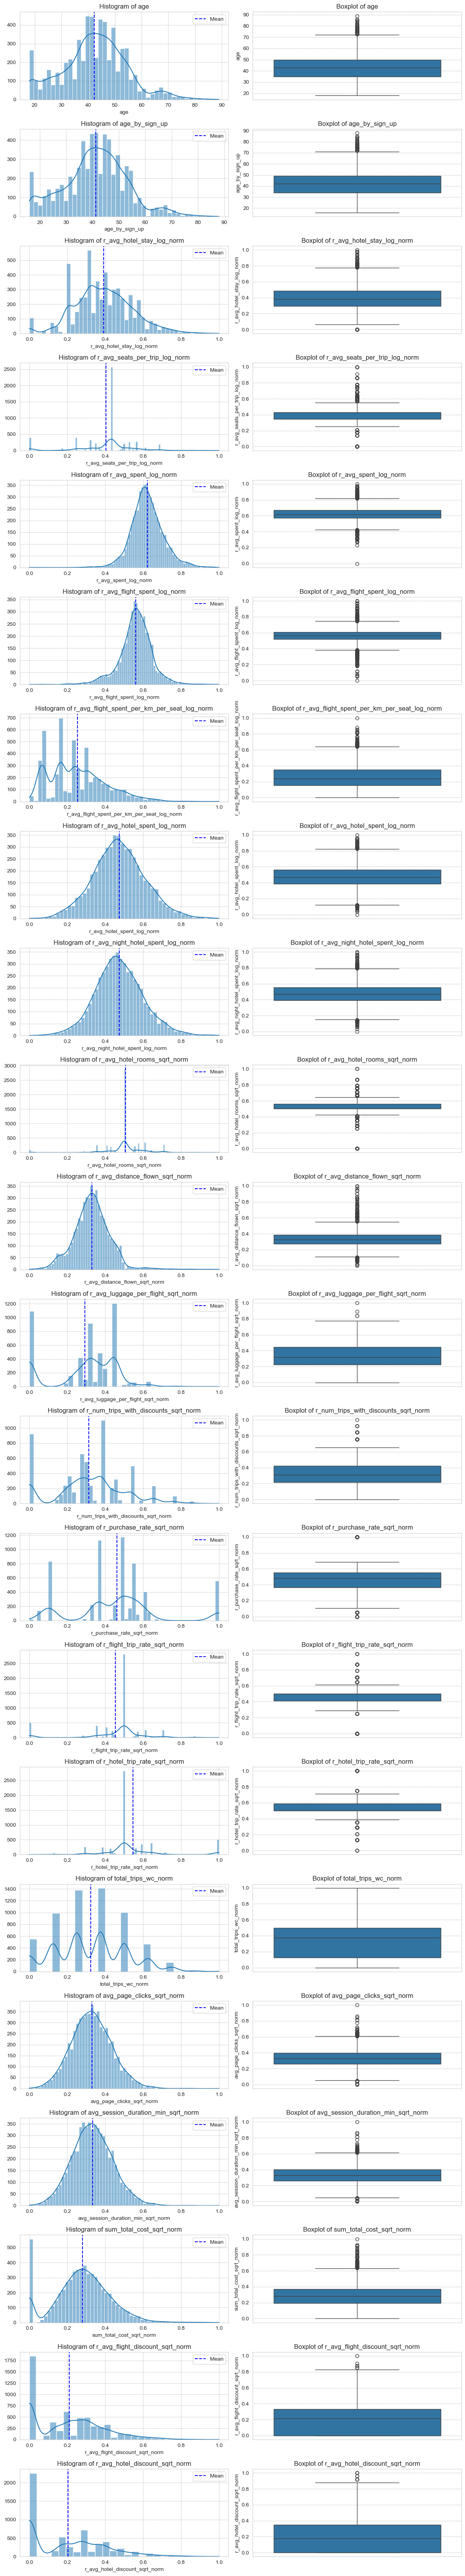

In [186]:
list_cr_user_df = ['age',
                   'age_by_sign_up',
                   'r_avg_hotel_stay_log_norm',
                   'r_avg_seats_per_trip_log_norm',
                   'r_avg_spent_log_norm',
                   'r_avg_flight_spent_log_norm',
                   'r_avg_flight_spent_per_km_per_seat_log_norm',
                   'r_avg_hotel_spent_log_norm',
                   'r_avg_night_hotel_spent_log_norm',
                   'r_avg_hotel_rooms_sqrt_norm',
                   'r_avg_distance_flown_sqrt_norm',
                   'r_avg_luggage_per_flight_sqrt_norm',
                   'r_num_trips_with_discounts_sqrt_norm',
                   'r_purchase_rate_sqrt_norm',
                   'r_flight_trip_rate_sqrt_norm',
                   'r_hotel_trip_rate_sqrt_norm',
                   'total_trips_wc_norm',
                   'avg_page_clicks_sqrt_norm',
                   'avg_session_duration_min_sqrt_norm',
                   'sum_total_cost_sqrt_norm',
                   'r_avg_flight_discount_sqrt_norm',
                   'r_avg_hotel_discount_sqrt_norm']


fig, axes = plt.subplots(len(list_cr_user_df), 2, figsize=(12, 3 * len(list_cr_user_df)))

for i, element in enumerate(list_cr_user_df):

    mean = cr_user_df[element].mean()

    sns.histplot(data=cr_user_df, x=cr_user_df[element], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'Histogram of {element}')
    axes[i, 0].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i, 0].set_ylabel('')
    axes[i, 0].legend()

    sns.boxplot(y=cr_user_df[element], ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {element}')


    plt.tight_layout()

plt.show()

# Creating Groups for our Perks



With these normalized metrics we can create a scrore for each perk.<br>

List of Perks we want to use:<br>

*   **Safety:** This perk will be send to our users with the most revenue. It ensures that TravelTide will book a hotel or a flight if the booked trip will have some issues, like a cancelled flight, so that the user can hold on to his travel mood without worrying about things that could go wrong.<br> *We are speaking about users who have a lot of money in camparison to our other user, so there is also the probability that we could charge them for this perk*<br><br>The user of this group can be called **Golden Geese**<br><br>

*   **Flight Discount:** Here we want users that book, in the best case, more flights than hotels, but never less flights than hotels. With this we ensure, that a flight discount reaches the right user. For that kind of information the user needs a steady trip rate inside our filter range, our in other words, the user needs to had some trips. <br><br>The user of this group can be called **Flying Seagull**<br><br>

*   **Hotel Discount:** The same as for the flight discount, but the other way around. So, in the best case, more hotels booked than flights.<br><br>The user of this group can be called **Hermit Crabs**<br><br>

*   **Free Bag:** Here we want to reach out to users that use flights regulary for their trips and also have an average bag use. <br><br>The user of this group can be called **Working Bees**<br><br>

*   **Free Hotel Night:** Here we want to create a group of users that booked a more or equal number of hotel visits to flights. <br><br>The user of this group can be called **Sleeping Squirrels**<br><br>

*   **Overall Discount Perk:** The users in this group will be the leftovers that did not get in any other perk. Most of them did not book a trip at all or if they did, they didn't spent a lot of money. We don't have enough data on why they didn't book a trip with us, so a good chance to motivate these kinds of people could be to reach out to them with a huge discount. This could also work nicely as a advertisement. <br><br>The user of this group can be called **Unsure Cats**<br><br>

**Starting with the Safety perk:**

In [190]:
weights_perk_safety = {'r_avg_spent_log_norm': 1,
                         'r_avg_flight_spent_log_norm': 0.4,
                         'r_avg_flight_spent_per_km_per_seat_log_norm': 0.4,
                         'r_avg_hotel_spent_log_norm': 0.4,
                         'r_avg_night_hotel_spent_log_norm': 0.4,
                         'sum_total_cost_sqrt_norm' : 1,
                         'total_trips_wc_norm': 0.8}

# Normalize weights to sum to 1
total_weight = sum(weights_perk_safety.values())
normalized_weights = {key: value / total_weight for key, value in weights_perk_safety.items()}

# Calculate combined score
cr_user_df['perk_safety'] = cr_user_df[['r_avg_spent_log_norm',
                                          'r_avg_flight_spent_log_norm',
                                          'r_avg_flight_spent_per_km_per_seat_log_norm',
                                          'r_avg_hotel_spent_log_norm',
                                          'r_avg_night_hotel_spent_log_norm',
                                          'sum_total_cost_sqrt_norm',
                                          'total_trips_wc_norm']].apply(lambda x: np.dot(x, list(normalized_weights.values())), axis=1)

**Followed by the Flight Discount perk:**

In [192]:
weights_perk_flight_discount = {'r_flight_trip_rate_sqrt_norm': 0.5,
                                'r_avg_flight_discount_sqrt_norm': 0.7,
                                'r_num_trips_with_discounts_sqrt_norm': 1,
                                'avg_session_duration_min_sqrt_norm': 0.7,
                                'avg_page_clicks_sqrt_norm': 0.7}


# Normalize weights to sum to 1
total_weight = sum(weights_perk_flight_discount.values())
normalized_weights = {key: value / total_weight for key, value in weights_perk_flight_discount.items()}


# Calculate combined score

cr_user_df['perk_flight_discount'] = cr_user_df[['r_flight_trip_rate_sqrt_norm',
                                                 'r_avg_flight_discount_sqrt_norm',
                                                 'r_num_trips_with_discounts_sqrt_norm',
                                                 'avg_session_duration_min_sqrt_norm',
                                                 'avg_page_clicks_sqrt_norm']].apply(lambda x: np.dot(x, list(normalized_weights.values())), axis=1)

**Next will be the Hotel Discount perk:**

In [194]:
weights_perk_hotel_discount = {  'r_hotel_trip_rate_sqrt_norm': 0.5,
                                 'r_avg_hotel_stay_log_norm': 0.5,
                                 'r_avg_hotel_discount_sqrt_norm': 0.7,
                                 'r_num_trips_with_discounts_sqrt_norm': 1,
                                 'avg_session_duration_min_sqrt_norm': 0.7,
                                 'avg_page_clicks_sqrt_norm': 0.7}

# Normalize weights to sum to 1
total_weight = sum(weights_perk_hotel_discount.values())
normalized_weights = {key: value / total_weight for key, value in weights_perk_hotel_discount.items()}


# Calculate combined score

cr_user_df['perk_hotel_discount'] = cr_user_df[['r_hotel_trip_rate_sqrt_norm',
                                                'r_avg_hotel_stay_log_norm',
                                                'r_avg_hotel_discount_sqrt_norm',
                                                'r_num_trips_with_discounts_sqrt_norm',
                                                'avg_session_duration_min_sqrt_norm',
                                                'avg_page_clicks_sqrt_norm']].apply(lambda x: np.dot(x, list(normalized_weights.values())), axis=1)

**The next in line is the Free Bag perk:**

In [196]:
weights_perk_free_bag = {'r_flight_trip_rate_sqrt_norm': 0.8,
                         'r_avg_seats_per_trip_log_norm': 0.3,
                         'r_avg_flight_spent_per_km_per_seat_log_norm': 0.6,
                         'r_avg_distance_flown_sqrt_norm': 0.3,
                         'r_avg_luggage_per_flight_sqrt_norm': 1}

# Normalize weights to sum to 1
total_weight = sum(weights_perk_free_bag.values())
normalized_weights = {key: value / total_weight for key, value in weights_perk_free_bag.items()}

# Calculate combined score

cr_user_df['perk_free_bag'] = cr_user_df[['r_flight_trip_rate_sqrt_norm',
                                          'r_avg_seats_per_trip_log_norm',
                                          'r_avg_flight_spent_per_km_per_seat_log_norm',
                                          'r_avg_distance_flown_sqrt_norm',
                                          'r_avg_luggage_per_flight_sqrt_norm']].apply(lambda x: np.dot(x, list(normalized_weights.values())), axis=1)

**Now we create the score for the Free Hotel Night perk:**

In [198]:
# Assign weights
weights_perk_free_hotel_night = {'r_hotel_trip_rate_sqrt_norm': 1,
                                 'r_avg_hotel_stay_log_norm': 0.8,
                                 'r_avg_hotel_rooms_sqrt_norm': 0.5,
                                 'r_avg_night_hotel_spent_log_norm': 0.8,}

# Normalize weights to sum to 1
total_weight = sum(weights_perk_free_hotel_night.values())
normalized_weights = {key: value / total_weight for key, value in weights_perk_free_hotel_night.items()}


# Calculate combined score

cr_user_df['perk_free_hotel_night'] = cr_user_df[['r_hotel_trip_rate_sqrt_norm',
                                                  'r_avg_hotel_stay_log_norm',
                                                  'r_avg_hotel_rooms_sqrt_norm',
                                                  'r_avg_night_hotel_spent_log_norm']].apply(lambda x: np.dot(x, list(normalized_weights.values())), axis=1)

**Lets see how the user base will be represented in each of these perks:**

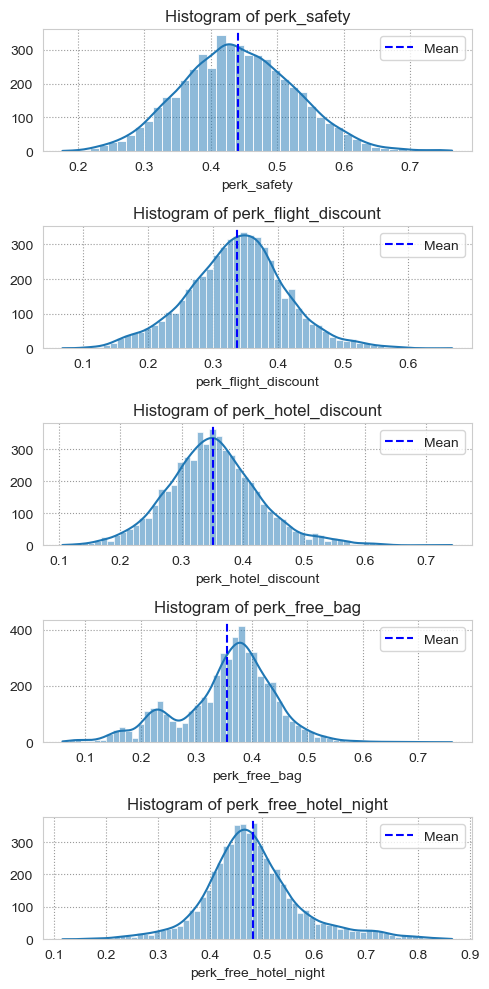

In [200]:
list_perks = ['perk_safety',
              'perk_flight_discount',
              'perk_hotel_discount',
              'perk_free_bag',
              'perk_free_hotel_night']


fig, axes = plt.subplots(len(list_perks), 1, figsize=(5, 2 * len(list_perks)))

for i, element in enumerate(list_perks):

    mean = cr_user_df[element].mean()

    sns.histplot(data=cr_user_df, x=cr_user_df[element], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {element}')
    axes[i].axvline(mean, color='b', linestyle='--', label='Mean')
    axes[i].set_ylabel('')
    axes[i].legend()

    # sns.boxplot(y=cr_user_df[element], ax=axes[i, 1])
    # axes[i, 1].set_title(f'Boxplot of {element}')


    plt.tight_layout()

plt.show()

These histogram shows us how our userbase is represented in each group. So now we can create our groups using the score number for each perk, every user has. The good thing is, we only need to adjust one number to change the group size.

In [202]:
list_perks = ['perk_safety',
              'perk_flight_discount',
              'perk_hotel_discount',
              'perk_free_bag',
              'perk_free_hotel_night']

def determine_bonus_perk(row):
    if (row['perk_safety'] >= 0.54) & (row['total_trips_wc_norm'] > 0):
        return 'Safety Perk'
    elif (row['perk_flight_discount'] >= 0.38) & (row['total_trips_wc_norm'] > 0) & (row['sum_flight_booked'] > 0):
        return 'Flight Discount Perk'
    elif (row['perk_hotel_discount'] >= 0.36) & (row['total_trips_wc_norm'] > 0) & (row['sum_hotel_booked'] > 0):
        return 'Hotel Discount Perk'
    elif (row['perk_free_bag'] >= 0.37) & (row['total_trips_wc_norm'] > 0) & (row['sum_flight_booked'] > 0):
        return 'Free Bag Perk'
    elif (row['perk_free_hotel_night'] >= 0.34) & (row['total_trips_wc_norm'] > 0) & (row['sum_hotel_booked'] > 0):
        return 'Free Hotel Night Perk'
    else:
        return 'Overall Discount Perk'

cr_user_df['bonus_perk'] = cr_user_df.apply(determine_bonus_perk, axis=1)

In [203]:
bonus_perk = cr_user_df['bonus_perk'].value_counts(normalize=True)
bonus_perk = bonus_perk.reset_index()
bonus_perk.columns = ['Bonus Perk', 'Percentage']
bonus_perk.Percentage = bonus_perk.Percentage * 100
bonus_perk.Percentage = bonus_perk.Percentage.round(2)
bonus_perk

Bonus Perk  Percentage
0   Flight Discount Perk       21.69
1          Free Bag Perk       20.04
2    Hotel Discount Perk       18.69
3  Free Hotel Night Perk       18.07
4  Overall Discount Perk       11.00
5            Safety Perk       10.50

Plotting charts so visualize the distribution for every perk:

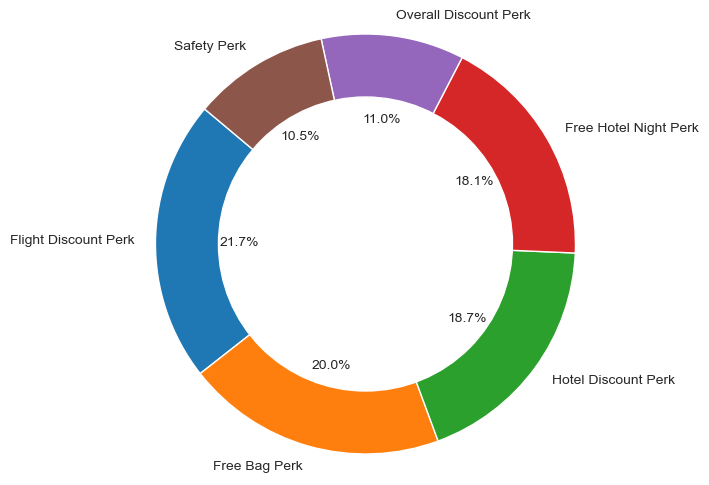

In [205]:
# Plotting the donut chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a pie chart and then add a circle at the center to make it look like a donut
wedges, texts, autotexts = ax.pie(
    bonus_perk['Percentage'],
    labels=bonus_perk['Bonus Perk'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops=dict(width=0.7)  # This makes it a donut by creating a hole
)

# Add a circle at the center to create a donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Title for the plot
#plt.title('Bonus Perk Distribution')

# Show the plot
plt.show()

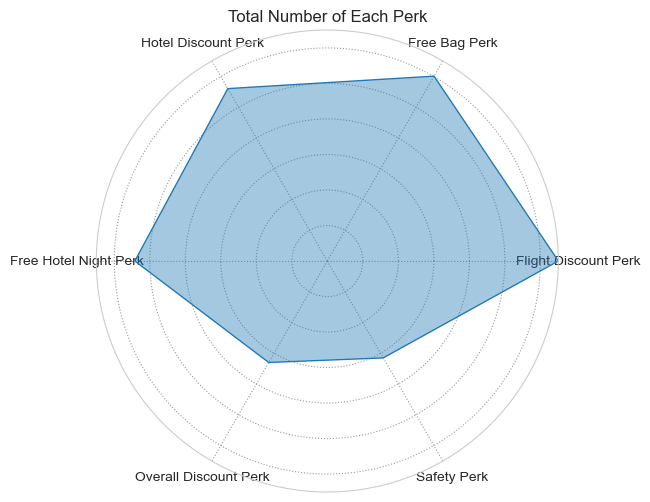

In [206]:
perk_counts = cr_user_df['bonus_perk'].value_counts()

# Prepare data for radar plot
labels = perk_counts.index.tolist()  # Unique Perk names
values = perk_counts.values.tolist()  # Count of each Perk
num_vars = len(labels)

# To make the radar plot close the circle, we need to repeat the first value
values += values[:1]
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Create Radar Plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.plot(angles, values, linewidth=1, linestyle='solid')
ax.fill(angles, values, alpha=0.4)

# Fix axis to go in the right order and at the right percentage
ax.set_ylim(0, max(values))

# Add labels to the plot
plt.xticks(angles[:-1], labels)
ax.set_yticklabels([])

# Show the plot
plt.title('Total Number of Each Perk')
plt.show()

Example user chart for the Safety perk:

In [208]:
list_metrics = ['r_avg_spent_log_norm',
              'r_avg_flight_spent_log_norm',
              'r_avg_flight_spent_per_km_per_seat_log_norm',
              'r_avg_hotel_spent_log_norm',
              'r_avg_night_hotel_spent_log_norm',
              'sum_total_cost_sqrt_norm',
              'total_trips_wc_norm']

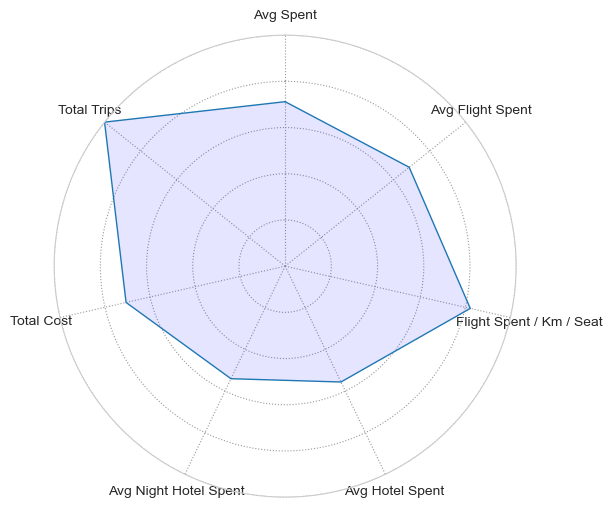

In [209]:
safty_labels = ['Avg Spent',
              'Avg Flight Spent',
              'Flight Spent / Km / Seat',
              'Avg Hotel Spent',
              'Avg Night Hotel Spent',
              'Total Cost',
              'Total Trips']


# Filter data for the specific user_id
user_id = 485544
user_data = cr_user_df[list_metrics][cr_user_df['user_id'] == user_id].values.flatten()

# Number of variables we're plotting
num_vars = len(list_metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot is a circle, so we need to "complete the loop" by appending the start to the end
user_data = np.concatenate((user_data, [user_data[0]]))
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the perimeter (outer ring will be 1)
plt.xticks(angles[:-1], safty_labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

# Plot data
ax.plot(angles, user_data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, user_data, 'b', alpha=0.1)

# Show the plot
plt.show()

Example user chart for the Flight Discount perk:

In [211]:
list_metrics = ['r_flight_trip_rate_sqrt_norm',
              'r_avg_flight_spent_log_norm',
              'r_avg_flight_discount_sqrt_norm',
              'r_num_trips_with_discounts_sqrt_norm',
              'avg_session_duration_min_sqrt_norm',
              'avg_page_clicks_sqrt_norm']

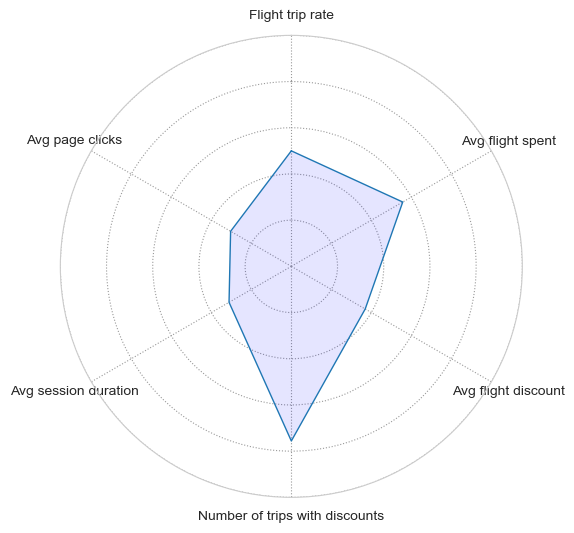

In [212]:
flight_discount_labels = ['Flight trip rate',
                          'Avg flight spent',
                          'Avg flight discount',
                          'Number of trips with discounts',
                          'Avg session duration',
                          'Avg page clicks']


# Filter data for the specific user_id
user_id = 516516
user_data = cr_user_df[list_metrics][cr_user_df['user_id'] == user_id].values.flatten()

# Number of variables we're plotting
num_vars = len(list_metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot is a circle, so we need to "complete the loop" by appending the start to the end
user_data = np.concatenate((user_data, [user_data[0]]))
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the perimeter (outer ring will be 1)
plt.xticks(angles[:-1], flight_discount_labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

# Plot data
ax.plot(angles, user_data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, user_data, 'b', alpha=0.1)

# Show the plot
plt.show()

Example user chart for the Hotel Discount perk:

In [214]:
list_metrics = ['r_hotel_trip_rate_sqrt_norm',
                'r_avg_hotel_stay_log_norm',
                'r_avg_hotel_discount_sqrt_norm',
                'r_num_trips_with_discounts_sqrt_norm',
                'avg_session_duration_min_sqrt_norm',
                'avg_page_clicks_sqrt_norm']

In [215]:
cr_user_df['bonus_perk'][cr_user_df['user_id'] == 518696]

168    Hotel Discount Perk
Name: bonus_perk, dtype: object

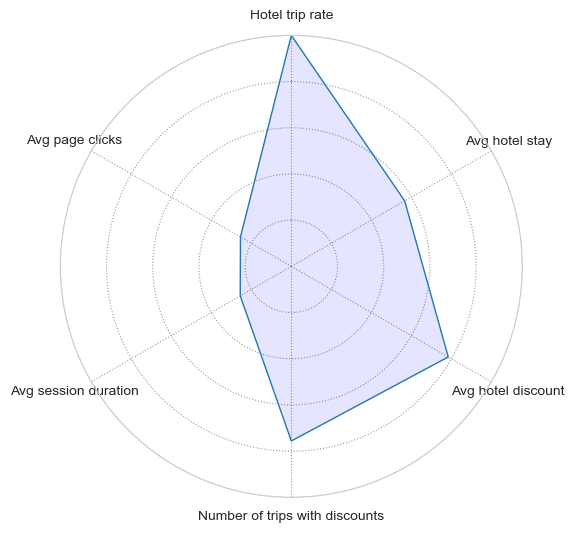

In [216]:
hotel_discount_labels = ['Hotel trip rate',
                          'Avg hotel stay',
                          'Avg hotel discount',
                          'Number of trips with discounts',
                          'Avg session duration',
                          'Avg page clicks']


# Filter data for the specific user_id
user_id = 518696
user_data = cr_user_df[list_metrics][cr_user_df['user_id'] == user_id].values.flatten()

# Number of variables we're plotting
num_vars = len(list_metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot is a circle, so we need to "complete the loop" by appending the start to the end
user_data = np.concatenate((user_data, [user_data[0]]))
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the perimeter (outer ring will be 1)
plt.xticks(angles[:-1], hotel_discount_labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

# Plot data
ax.plot(angles, user_data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, user_data, 'b', alpha=0.1)

# Show the plot
plt.show()

Example user chart for the Free Bag perk:

In [218]:
list_metrics = ['r_flight_trip_rate_sqrt_norm',
                 'r_avg_seats_per_trip_log_norm',
                 'r_avg_flight_spent_per_km_per_seat_log_norm',
                 'r_avg_distance_flown_sqrt_norm',
                 'r_avg_luggage_per_flight_sqrt_norm']

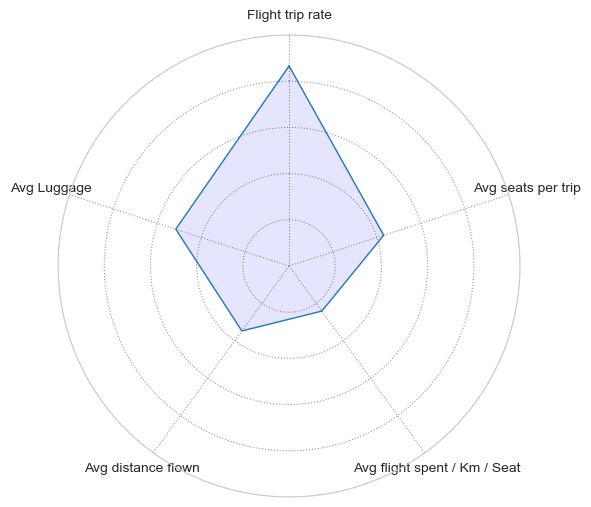

In [219]:
free_bag_labels = ['Flight trip rate',
                   'Avg seats per trip',
                   'Avg flight spent / Km / Seat',
                   'Avg distance flown',
                   'Avg Luggage']


# Filter data for the specific user_id
user_id = 588048
user_data = cr_user_df[list_metrics][cr_user_df['user_id'] == user_id].values.flatten()

# Number of variables we're plotting
num_vars = len(list_metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot is a circle, so we need to "complete the loop" by appending the start to the end
user_data = np.concatenate((user_data, [user_data[0]]))
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the perimeter (outer ring will be 1)
plt.xticks(angles[:-1], free_bag_labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

# Plot data
ax.plot(angles, user_data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, user_data, 'b', alpha=0.1)

# Show the plot
plt.show()

Example user chart for the Free Hotel Night perk:

In [221]:
list_metrics = ['r_hotel_trip_rate_sqrt_norm',
                'r_avg_hotel_stay_log_norm',
                'r_avg_hotel_rooms_sqrt_norm',
                'r_avg_night_hotel_spent_log_norm']

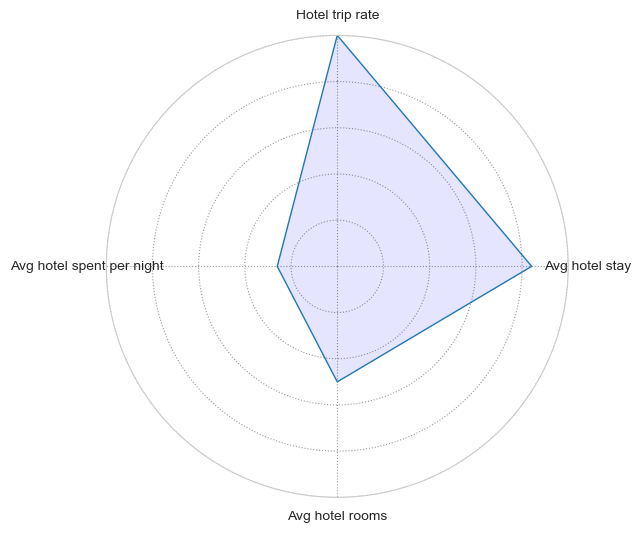

In [222]:
free_hotel_night_labels = ['Hotel trip rate',
                           'Avg hotel stay',
                           'Avg hotel rooms',
                           'Avg hotel spent per night']


# Filter data for the specific user_id
user_id = 721570
user_data = cr_user_df[list_metrics][cr_user_df['user_id'] == user_id].values.flatten()

# Number of variables we're plotting
num_vars = len(list_metrics)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The radar plot is a circle, so we need to "complete the loop" by appending the start to the end
user_data = np.concatenate((user_data, [user_data[0]]))
angles += angles[:1]

# Create the figure
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw the perimeter (outer ring will be 1)
plt.xticks(angles[:-1], free_hotel_night_labels)
ax.set_ylim(0, 1)
ax.set_yticklabels([])

# Plot data
ax.plot(angles, user_data, linewidth=1, linestyle='solid')

# Fill area
ax.fill(angles, user_data, 'b', alpha=0.1)

# Show the plot
plt.show()

**Plotting radar plots with weightings for each perk.**

Safety:

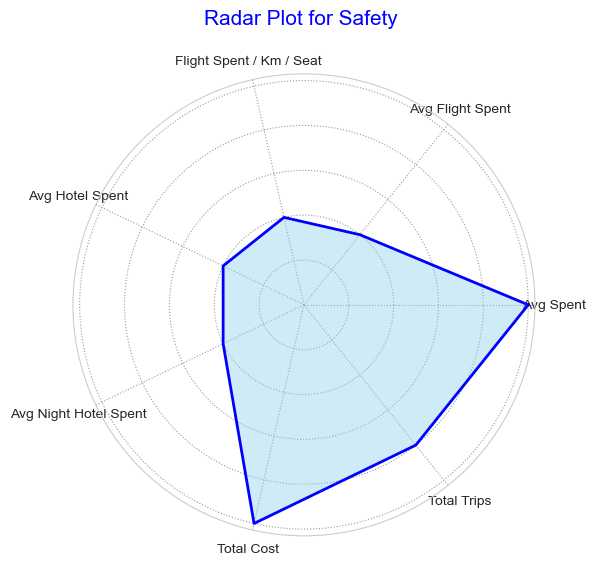

In [225]:
# Dictionary data
weights_perk_safety = {'r_avg_spent_log_norm': 1,
                         'r_avg_flight_spent_log_norm': 0.4,
                         'r_avg_flight_spent_per_km_per_seat_log_norm': 0.4,
                         'r_avg_hotel_spent_log_norm': 0.4,
                         'r_avg_night_hotel_spent_log_norm': 0.4,
                         'sum_total_cost_sqrt_norm' : 1,
                         'total_trips_wc_norm': 0.8}

safty_labels = ['Avg Spent',
              'Avg Flight Spent',
              'Flight Spent / Km / Seat',
              'Avg Hotel Spent',
              'Avg Night Hotel Spent',
              'Total Cost',
              'Total Trips']

# Prepare data for radar plot
values = list(weights_perk_safety.values())

# Add the first value to the end to close the radar chart
values += values[:1]
safty_labels += safty_labels[:1]

# Correct the number of variables and their angles
num_vars = len(safty_labels) - 1  # Adjust since we added the first value at the end

# Compute the angles again, but with the corrected number of variables
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill and plot the radar chart
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(safty_labels[:-1])  # Remove the duplicate label for proper display

plt.title(f'Radar Plot for Safety \n', size=15, color='blue')
plt.show()

Flight Discount:

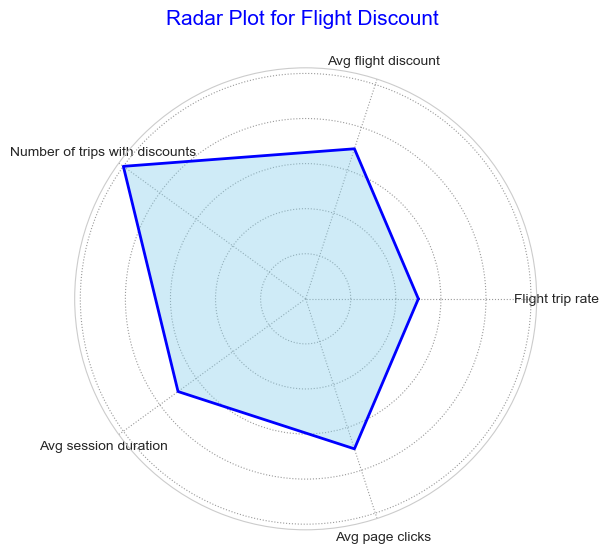

In [227]:
# Dictionary data
weights_perk_flight_discount = {
    'r_flight_trip_rate_sqrt_norm': 0.5,
    'r_avg_flight_discount_sqrt_norm': 0.7,
    'r_num_trips_with_discounts_sqrt_norm': 1,
    'avg_session_duration_min_sqrt_norm': 0.7,
    'avg_page_clicks_sqrt_norm': 0.7
}

flight_discount_labels = ['Flight trip rate',
                          'Avg flight discount',
                          'Number of trips with discounts',
                          'Avg session duration',
                          'Avg page clicks']

# Prepare data for radar plot
values = list(weights_perk_flight_discount.values())

# Add the first value to the end to close the radar chart
values += values[:1]
flight_discount_labels += flight_discount_labels[:1]

# Correct the number of variables and their angles
num_vars = len(flight_discount_labels) - 1  # Adjust since we added the first value at the end

# Compute the angles again, but with the corrected number of variables
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill and plot the radar chart
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(flight_discount_labels[:-1])  # Remove the duplicate label for proper display

plt.title(f'Radar Plot for Flight Discount \n', size=15, color='blue')
plt.show()

Hotel Discount:

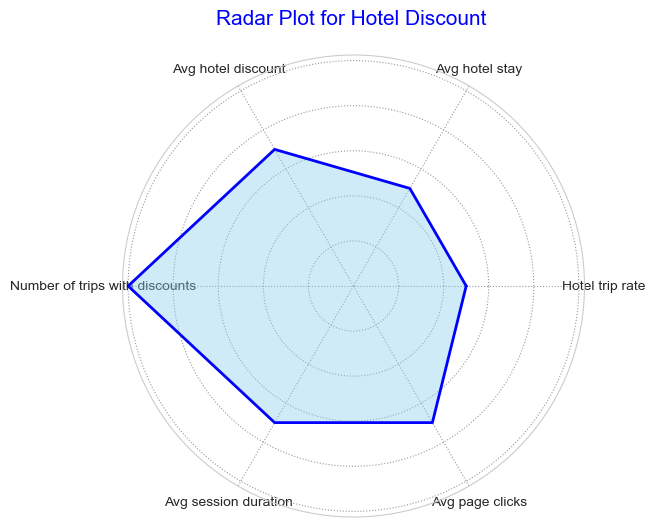

In [229]:
# Dictionary data
weights_perk_hotel_discount = {  'r_hotel_trip_rate_sqrt_norm': 0.5,
                                 'r_avg_hotel_stay_log_norm': 0.5,
                                 'r_avg_hotel_discount_sqrt_norm': 0.7,
                                 'r_num_trips_with_discounts_sqrt_norm': 1,
                                 'avg_session_duration_min_sqrt_norm': 0.7,
                                 'avg_page_clicks_sqrt_norm': 0.7}

hotel_discount_labels = ['Hotel trip rate',
                          'Avg hotel stay',
                          'Avg hotel discount',
                          'Number of trips with discounts',
                          'Avg session duration',
                          'Avg page clicks']

# Prepare data for radar plot
values = list(weights_perk_hotel_discount.values())

# Add the first value to the end to close the radar chart
values += values[:1]
hotel_discount_labels += hotel_discount_labels[:1]

# Correct the number of variables and their angles
num_vars = len(hotel_discount_labels) - 1  # Adjust since we added the first value at the end

# Compute the angles again, but with the corrected number of variables
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill and plot the radar chart
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(hotel_discount_labels[:-1])  # Remove the duplicate label for proper display

plt.title(f'Radar Plot for Hotel Discount \n', size=15, color='blue')
plt.show()

Free Bag:

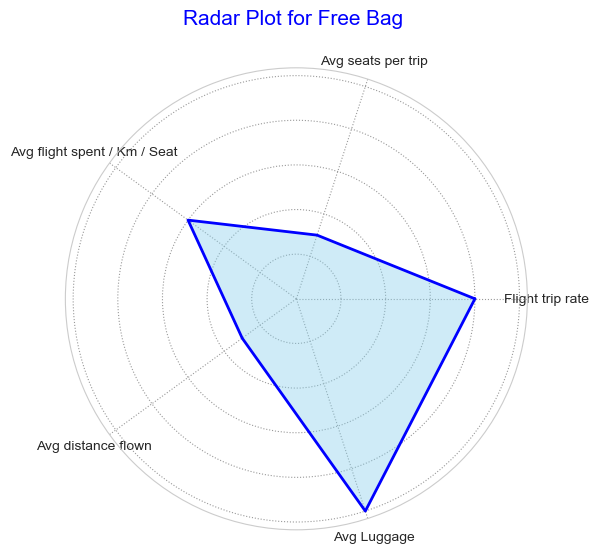

In [231]:
# Dictionary data
weights_perk_free_bag = {'r_flight_trip_rate_sqrt_norm': 0.8,
                         'r_avg_seats_per_trip_log_norm': 0.3,
                         'r_avg_flight_spent_per_km_per_seat_log_norm': 0.6,
                         'r_avg_distance_flown_sqrt_norm': 0.3,
                         'r_avg_luggage_per_flight_sqrt_norm': 1}

free_bag_labels = ['Flight trip rate',
                   'Avg seats per trip',
                   'Avg flight spent / Km / Seat',
                   'Avg distance flown',
                   'Avg Luggage']

# Prepare data for radar plot
values = list(weights_perk_free_bag.values())

# Add the first value to the end to close the radar chart
values += values[:1]
free_bag_labels += free_bag_labels[:1]

# Correct the number of variables and their angles
num_vars = len(free_bag_labels) - 1  # Adjust since we added the first value at the end

# Compute the angles again, but with the corrected number of variables
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill and plot the radar chart
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(free_bag_labels[:-1])  # Remove the duplicate label for proper display

plt.title(f'Radar Plot for Free Bag \n', size=15, color='blue')
plt.show()

Free Hotel Night:

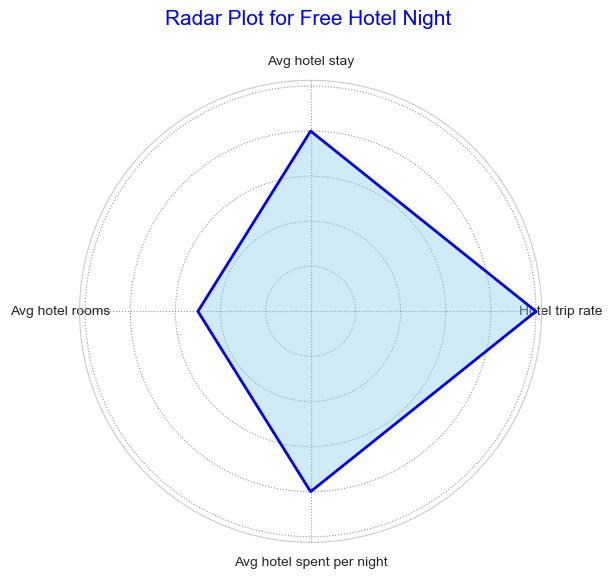

In [233]:
# Dictionary data
weights_perk_free_hotel_night = {'r_hotel_trip_rate_sqrt_norm': 1,
                                 'r_avg_hotel_stay_log_norm': 0.8,
                                 'r_avg_hotel_rooms_sqrt_norm': 0.5,
                                 'r_avg_night_hotel_spent_log_norm': 0.8,}

free_hotel_night_labels = ['Hotel trip rate',
                           'Avg hotel stay',
                           'Avg hotel rooms',
                           'Avg hotel spent per night']

# Prepare data for radar plot
values = list(weights_perk_free_hotel_night.values())

# Add the first value to the end to close the radar chart
values += values[:1]
free_hotel_night_labels += free_hotel_night_labels[:1]

# Correct the number of variables and their angles
num_vars = len(free_hotel_night_labels) - 1  # Adjust since we added the first value at the end

# Compute the angles again, but with the corrected number of variables
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Plot radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Fill and plot the radar chart
ax.fill(angles, values, color='skyblue', alpha=0.4)
ax.plot(angles, values, color='blue', linewidth=2)

ax.set_yticklabels([])  # Hide radial labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(free_hotel_night_labels[:-1])  # Remove the duplicate label for proper display

plt.title(f'Radar Plot for Free Hotel Night \n', size=15, color='blue')
plt.show()

In [234]:
cr_user_df.to_csv('Travel_Tide_user_perk_Stephan_Welzel.csv', index=False)